In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/Part_1_Crime_Data.csv'
df = pd.read_csv(file_path, parse_dates=['CrimeDateTime'])


<ipython-input-3-40e133803dfd>:8: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=['CrimeDateTime'])


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Filter relevant columns
columns_of_interest = ['RowID', 'CrimeDateTime', 'CrimeCode', 'Description', 'Neighborhood']
df = df[columns_of_interest]


df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'], errors = 'coerce').dt.strftime('%m%Y')
df['CrimeDateTime'] = df['CrimeDateTime'].fillna(0)
df['Year'] = pd.to_datetime(df['CrimeDateTime']).dt.strftime('%Y').astype(int)
df = df[(df['Year'] >= 2017)& (df['Year'] <= 2022) ]
df


RowID CrimeDateTime CrimeCode   Description           Neighborhood  \
5          15        102019        4B  AGG. ASSAULT         MCELDERRY PARK   
6          16        102019        4C  AGG. ASSAULT  EAST BALTIMORE MIDWAY   
7          22        102019        4C  AGG. ASSAULT               WESTPORT   
41        690        122018        4C  AGG. ASSAULT              FRANKFORD   
42        694        122018        4B  AGG. ASSAULT              FRANKFORD   
...       ...           ...       ...           ...                    ...   
46017  589768        042017        4C  AGG. ASSAULT              FRANKFORD   
46018  589770        042017        4C  AGG. ASSAULT               PEN LUCY   
46019  589774        042017        1K      HOMICIDE               IDLEWOOD   
46020  589780        042017        4A  AGG. ASSAULT            FELLS POINT   
46021  589785        042017        4A  AGG. ASSAULT      ARMISTEAD GARDENS   

       Year  
5      2019  
6      2019  
7      2019  
41     2018  
42     2018  
...     ...  
46017  2017  
46018  2017  
46019  2017  
46020  2017  
46021  2017  

[40221 rows x 6 columns]

In [5]:
# Group data by year and neighborhood, calculate counts
crime_counts = df.groupby(['Year', 'Neighborhood']).size().reset_index(name='Total_Incidents')

# Pivot the table to have years as columns
crime_counts_pivot = crime_counts.pivot(index='Neighborhood', columns='Year', values='Total_Incidents').fillna(0)



In [6]:
# Calculate the difference in counts from 2017 to 2022
print("Table showing the difference of counts from 2017 to 2022:")
crime_counts_pivot['Difference'] = crime_counts_pivot[2022] - crime_counts_pivot[2017]
print(crime_counts_pivot['Difference'])

Table showing the difference of counts from 2017 to 2022:
Neighborhood
ABELL                 1.0
ALLENDALE           -13.0
ARCADIA              -1.0
ARLINGTON             7.0
ARMISTEAD GARDENS   -12.0
                     ... 
WYMAN PARK            0.0
WYNDHURST            -1.0
Woodmere              0.0
YALE HEIGHTS          0.0
YORK-HOMELAND         7.0
Name: Difference, Length: 278, dtype: float64


In [7]:
# Calculate the percentage change
print("\nTable showing the percentage change from 2017 to 2022:")
crime_counts_pivot['PercentageChange'] = (crime_counts_pivot['Difference'] / crime_counts_pivot[2017]) * 100
print(crime_counts_pivot['PercentageChange'])


Table showing the percentage change from 2017 to 2022:
Neighborhood
ABELL                  8.333333
ALLENDALE            -27.083333
ARCADIA              -16.666667
ARLINGTON             12.280702
ARMISTEAD GARDENS    -48.000000
                        ...    
WYMAN PARK                  NaN
WYNDHURST           -100.000000
Woodmere                    NaN
YALE HEIGHTS           0.000000
YORK-HOMELAND               inf
Name: PercentageChange, Length: 278, dtype: float64


In [8]:
# Sort neighborhoods based on the difference
sorted_neighborhoods = crime_counts_pivot.sort_values(by='Difference', ascending=False)
crime_vs_year = sorted_neighborhoods
print(sorted_neighborhoods)


Year                    2017   2018   2019   2020   2021   2022  Difference  \
Neighborhood                                                                  
FRANKFORD              121.0  147.0  166.0  169.0  148.0  218.0        97.0   
DOWNTOWN               158.0  207.0  211.0  188.0  201.0  222.0        64.0   
UPTON                  124.0  116.0  147.0   94.0  143.0  174.0        50.0   
EAST BALTIMORE MIDWAY   63.0   68.0  110.0   77.0   86.0   97.0        34.0   
ELLWOOD PARK/MONUMENT   58.0   90.0   67.0   78.0   77.0   89.0        31.0   
...                      ...    ...    ...    ...    ...    ...         ...   
PERKINS HOMES           29.0   28.0   28.0   15.0    3.0    2.0       -27.0   
BROADWAY EAST          115.0  117.0  111.0   91.0  150.0   87.0       -28.0   
SANDTOWN-WINCHESTER    207.0  155.0  147.0  171.0  156.0  168.0       -39.0   
BALTIMORE HIGHLANDS     81.0   63.0   56.0   43.0   76.0   40.0       -41.0   
BROOKLYN               226.0  137.0  163.0  139.0  1

In [9]:
# Select top 5 and bottom 5 neighborhoods
top_5_neighborhoods = sorted_neighborhoods.head(5)
bottom_5_neighborhoods = sorted_neighborhoods.tail(5)

# Display summary tables
print("Top 5 Neighborhoods with Highest Increase:")
print(top_5_neighborhoods[['Difference', 'PercentageChange']])

print("\nTop 5 Neighborhoods with Highest Decrease:")
print(bottom_5_neighborhoods[['Difference', 'PercentageChange']])

Top 5 Neighborhoods with Highest Increase:
Year                   Difference  PercentageChange
Neighborhood                                       
FRANKFORD                    97.0         80.165289
DOWNTOWN                     64.0         40.506329
UPTON                        50.0         40.322581
EAST BALTIMORE MIDWAY        34.0         53.968254
ELLWOOD PARK/MONUMENT        31.0         53.448276

Top 5 Neighborhoods with Highest Decrease:
Year                 Difference  PercentageChange
Neighborhood                                     
PERKINS HOMES             -27.0        -93.103448
BROADWAY EAST             -28.0        -24.347826
SANDTOWN-WINCHESTER       -39.0        -18.840580
BALTIMORE HIGHLANDS       -41.0        -50.617284
BROOKLYN                  -49.0        -21.681416


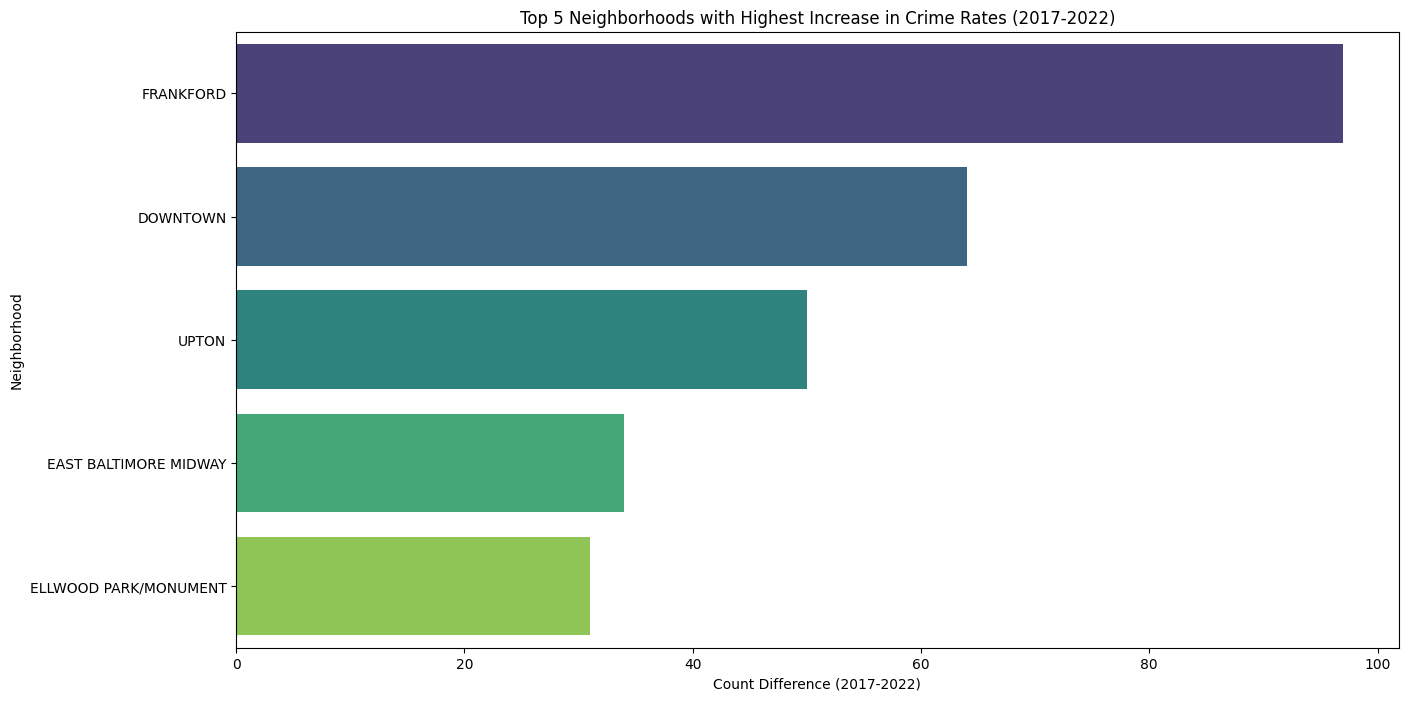

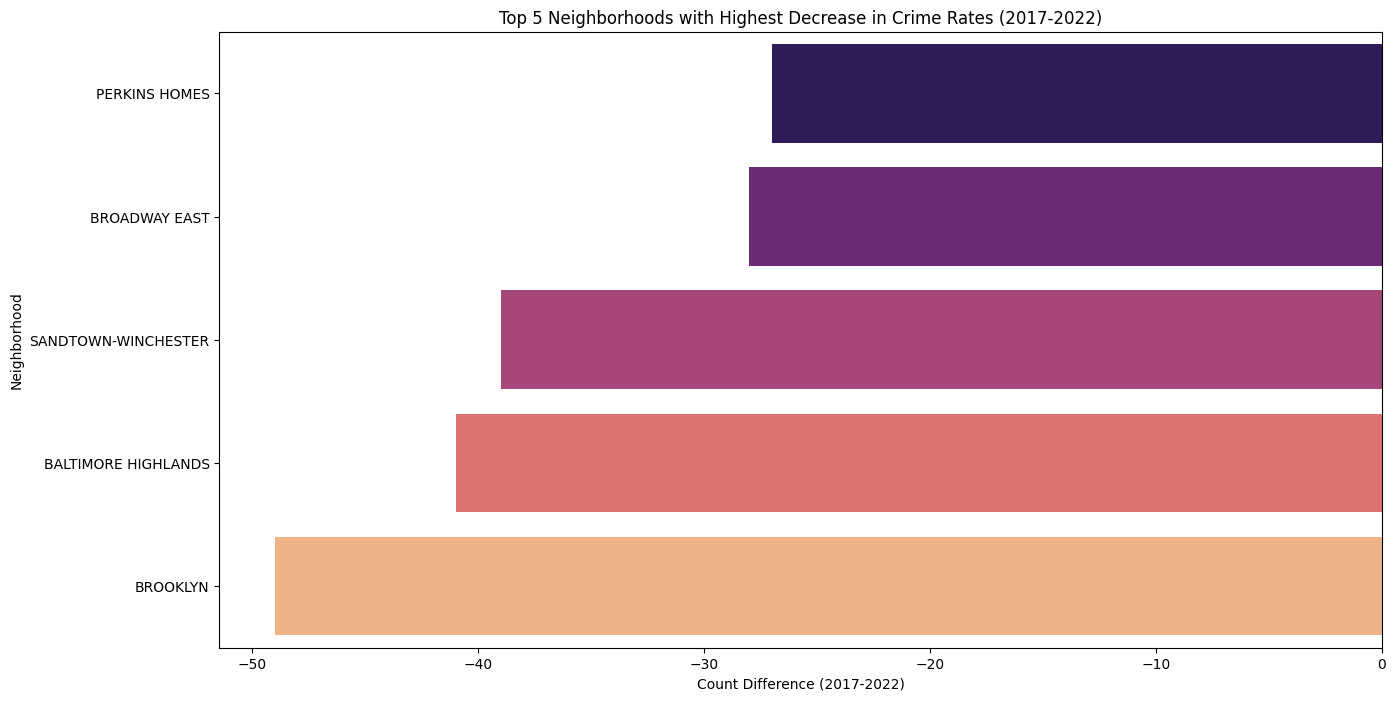

In [10]:
# Create visualizations
plt.figure(figsize=(15, 8))
sns.barplot(x='Difference', y=top_5_neighborhoods.index, data=top_5_neighborhoods, palette='viridis')
plt.title('Top 5 Neighborhoods with Highest Increase in Crime Rates (2017-2022)')
plt.xlabel('Count Difference (2017-2022)')
plt.ylabel('Neighborhood')
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(x='Difference', y=bottom_5_neighborhoods.index, data=bottom_5_neighborhoods, palette='magma')
plt.title('Top 5 Neighborhoods with Highest Decrease in Crime Rates (2017-2022)')
plt.xlabel('Count Difference (2017-2022)')
plt.ylabel('Neighborhood')
plt.show()

In [11]:
# Display the table
print("Table showing the count of crimes and how those numbers have varied each year:")
print(crime_counts_pivot)
crime_data_neighbothood_vs_year

Table showing the count of crimes and how those numbers have varied each year:
Year               2017  2018  2019  2020  2021  2022  Difference  \
Neighborhood                                                        
ABELL              12.0  13.0  10.0   7.0   8.0  13.0         1.0   
ALLENDALE          48.0  56.0  48.0  24.0  48.0  35.0       -13.0   
ARCADIA             6.0   9.0   7.0  10.0   6.0   5.0        -1.0   
ARLINGTON          57.0  38.0  38.0  35.0  44.0  64.0         7.0   
ARMISTEAD GARDENS  25.0  18.0  14.0  22.0  24.0  13.0       -12.0   
...                 ...   ...   ...   ...   ...   ...         ...   
WYMAN PARK          0.0   1.0   1.0   2.0   2.0   0.0         0.0   
WYNDHURST           1.0   1.0   0.0   0.0   1.0   0.0        -1.0   
Woodmere            0.0   0.0   0.0   0.0   1.0   0.0         0.0   
YALE HEIGHTS       16.0  13.0  17.0  29.0  14.0  16.0         0.0   
YORK-HOMELAND       0.0   3.0   3.0   3.0   6.0   7.0         7.0   

Year               Perc

NameError: ignored

In [12]:
# Create a list of selected neighborhoods
selected_neighborhoods = list(top_5_neighborhoods.index) + list(bottom_5_neighborhoods.index)

# Filter the original DataFrame based on selected neighborhoods
selected_neighborhood_data = df[df['Neighborhood'].isin(selected_neighborhoods)]


In [13]:
# Group data by year, neighborhood, and count incidents
selected_neighborhood_counts = selected_neighborhood_data.groupby(['Year', 'Neighborhood']).size().reset_index(name='Total_Incidents')

# Pivot the table to have years as columns
selected_neighborhood_counts_pivot = selected_neighborhood_counts.pivot(index='Neighborhood', columns='Year', values='Total_Incidents').fillna(0)

# Calculate the difference in counts from 2017 to 2022
selected_neighborhood_counts_pivot['Difference'] = selected_neighborhood_counts_pivot[2022] - selected_neighborhood_counts_pivot[2017]

# Display the table
print("\nTable showing the count of crimes and how those numbers have varied each year for selected neighborhoods:")
print(selected_neighborhood_counts_pivot)




Table showing the count of crimes and how those numbers have varied each year for selected neighborhoods:
Year                   2017  2018  2019  2020  2021  2022  Difference
Neighborhood                                                         
BALTIMORE HIGHLANDS      81    63    56    43    76    40         -41
BROADWAY EAST           115   117   111    91   150    87         -28
BROOKLYN                226   137   163   139   128   177         -49
DOWNTOWN                158   207   211   188   201   222          64
EAST BALTIMORE MIDWAY    63    68   110    77    86    97          34
ELLWOOD PARK/MONUMENT    58    90    67    78    77    89          31
FRANKFORD               121   147   166   169   148   218          97
PERKINS HOMES            29    28    28    15     3     2         -27
SANDTOWN-WINCHESTER     207   155   147   171   156   168         -39
UPTON                   124   116   147    94   143   174          50


In [14]:
# Display the selected neighborhood data
print("\nSelected neighborhood data:")
print(selected_neighborhood_data)



Selected neighborhood data:
        RowID CrimeDateTime CrimeCode   Description           Neighborhood  \
6          16        102019        4C  AGG. ASSAULT  EAST BALTIMORE MIDWAY   
41        690        122018        4C  AGG. ASSAULT              FRANKFORD   
42        694        122018        4B  AGG. ASSAULT              FRANKFORD   
45        780        122018        4A  AGG. ASSAULT    SANDTOWN-WINCHESTER   
54        994        072018        1A      HOMICIDE  EAST BALTIMORE MIDWAY   
...       ...           ...       ...           ...                    ...   
46000  589530        062017        4C  AGG. ASSAULT    SANDTOWN-WINCHESTER   
46002  589574        062017        4C  AGG. ASSAULT               DOWNTOWN   
46004  589683        062017        9S      SHOOTING  EAST BALTIMORE MIDWAY   
46011  589716        042017        4A  AGG. ASSAULT  ELLWOOD PARK/MONUMENT   
46017  589768        042017        4C  AGG. ASSAULT              FRANKFORD   

       Year  
6      2019  
41    

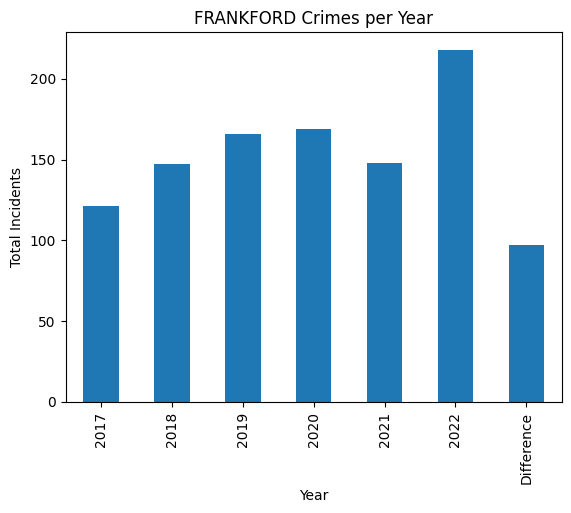

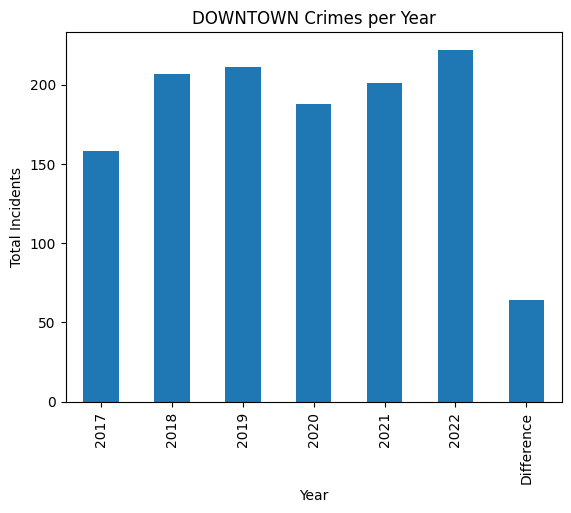

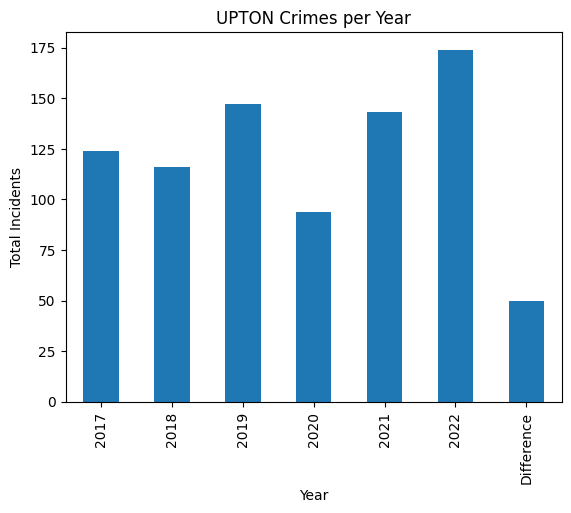

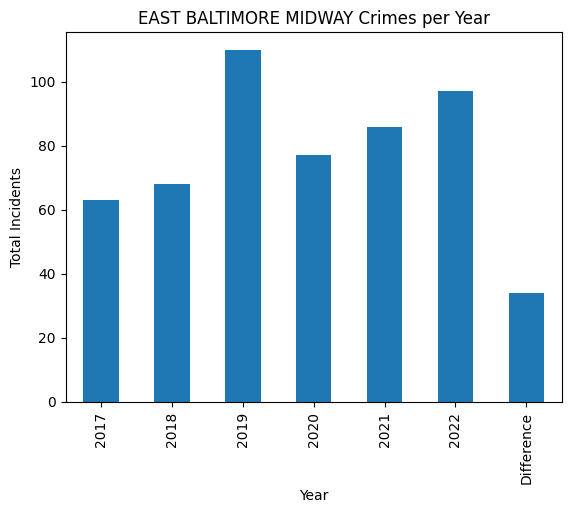

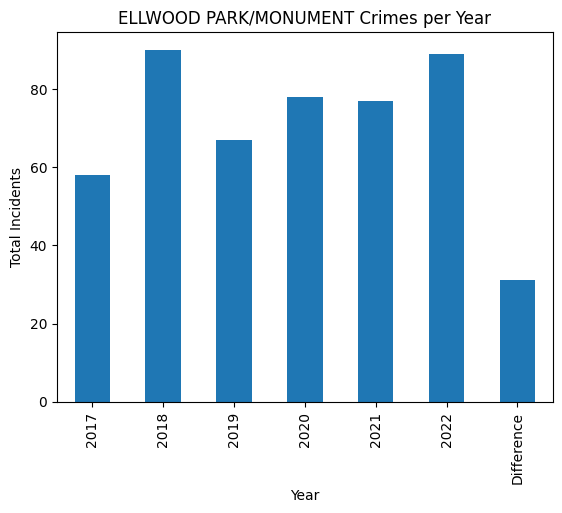

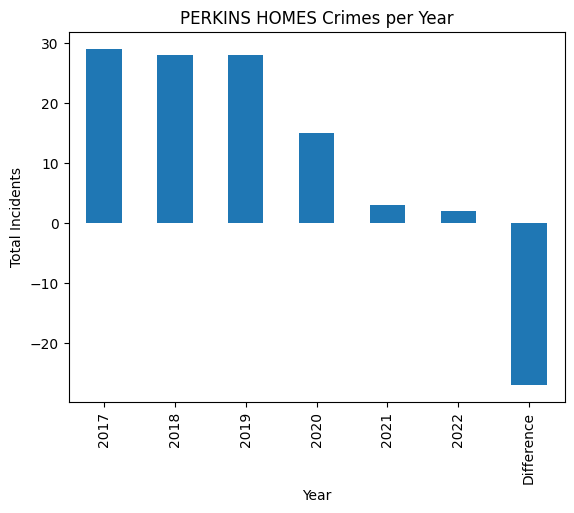

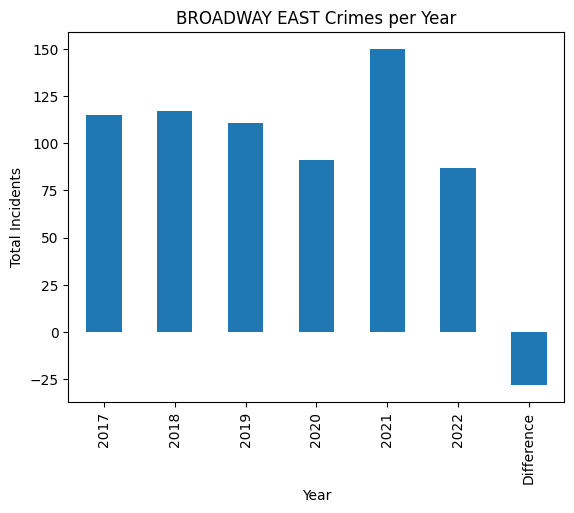

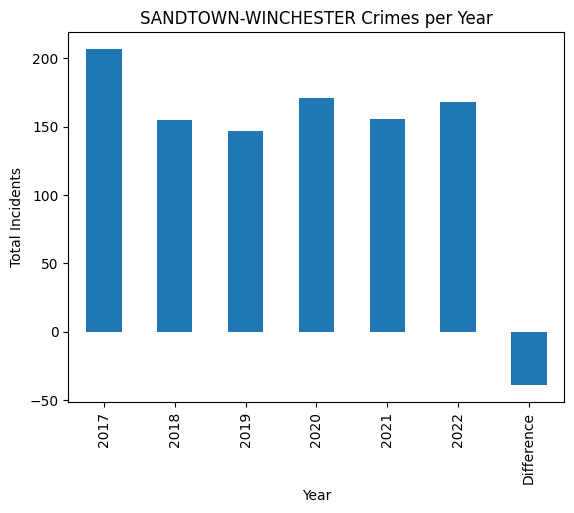

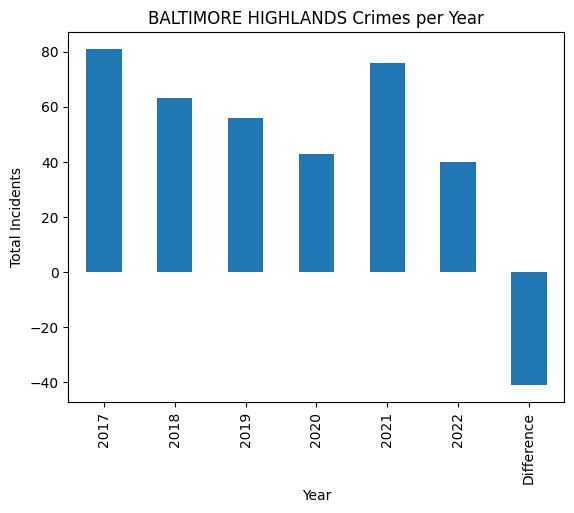

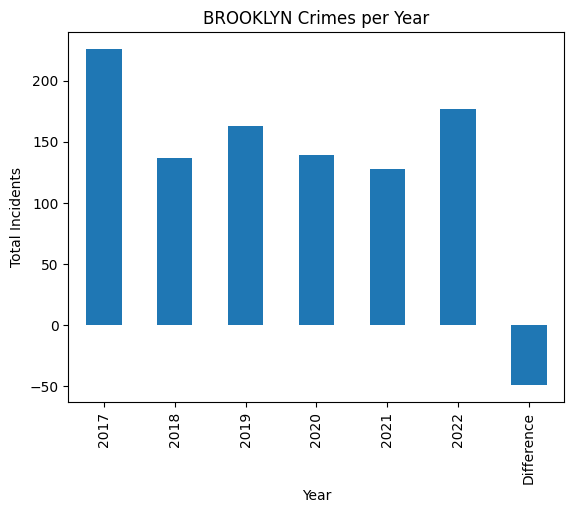

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Create list of selected neighborhoods
selected_neighborhoods = list(top_5_neighborhoods.index) + list(bottom_5_neighborhoods.index)

# Create dataframe with counts for each year per neighborhood
counts_df = selected_neighborhood_counts_pivot

# Plot charts
for neighborhood in selected_neighborhoods:

    # Extract data
    data = counts_df.loc[neighborhood]

    # Plot bar chart
    data.plot(kind='bar')

    # Customize chart
    plt.title(f'{neighborhood} Crimes per Year')
    plt.xlabel('Year')
    plt.ylabel('Total Incidents')
    plt.show()


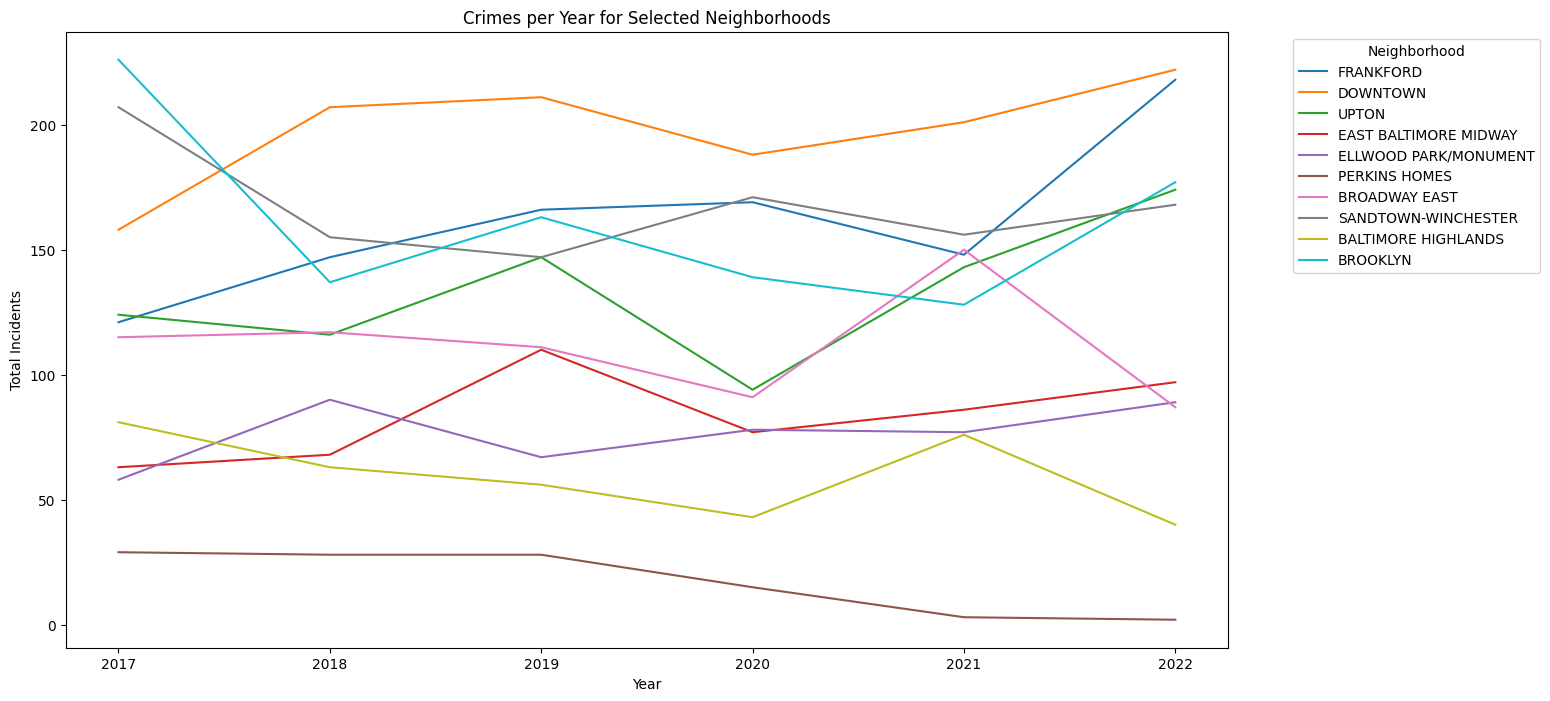

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Create list of selected neighborhoods
selected_neighborhoods = list(top_5_neighborhoods.index) + list(bottom_5_neighborhoods.index)

# Create dataframe with counts for each year per neighborhood
counts_df = selected_neighborhood_counts_pivot

# Plot charts
plt.figure(figsize=(15, 8))

for neighborhood in selected_neighborhoods:
    # Extract data, excluding the 'Difference' column
    data = counts_df.loc[neighborhood].drop('Difference', errors='ignore')

    # Plot line chart for each neighborhood on the same plot
    plt.plot(data.index, data, label=neighborhood)

# Customize chart
plt.title('Crimes per Year for Selected Neighborhoods')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

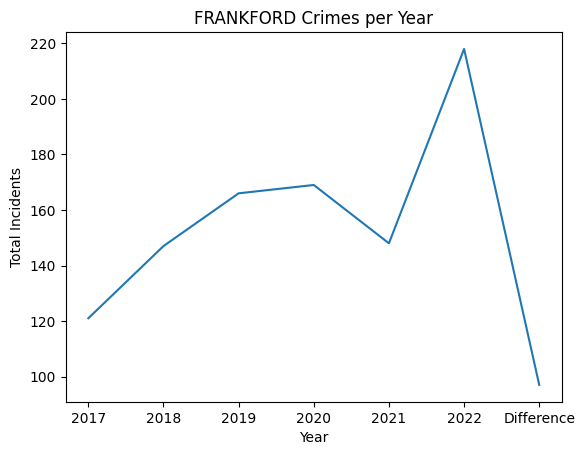

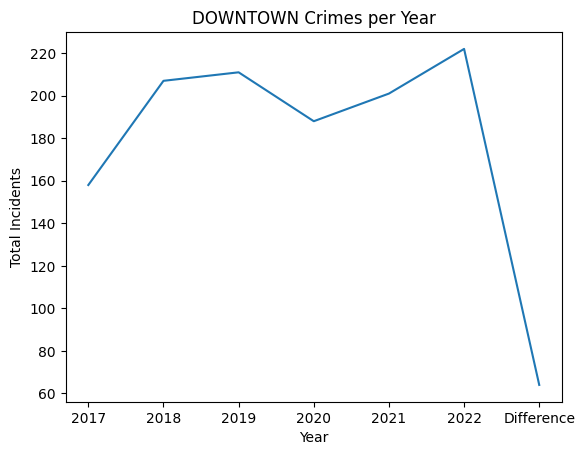

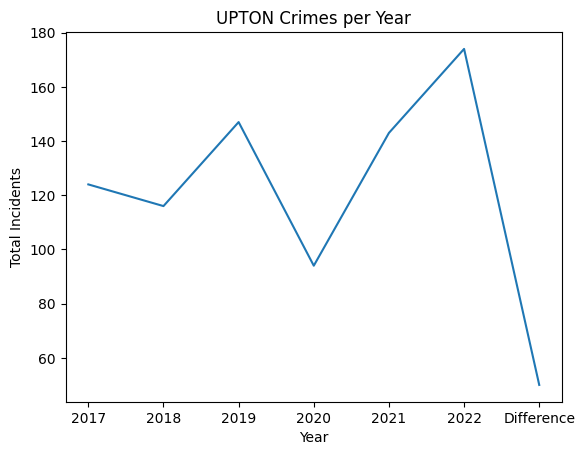

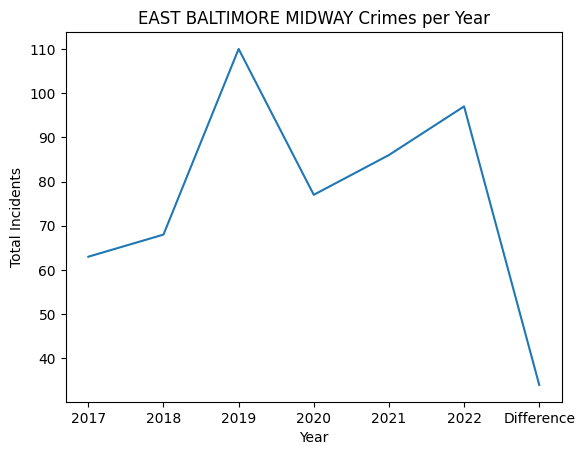

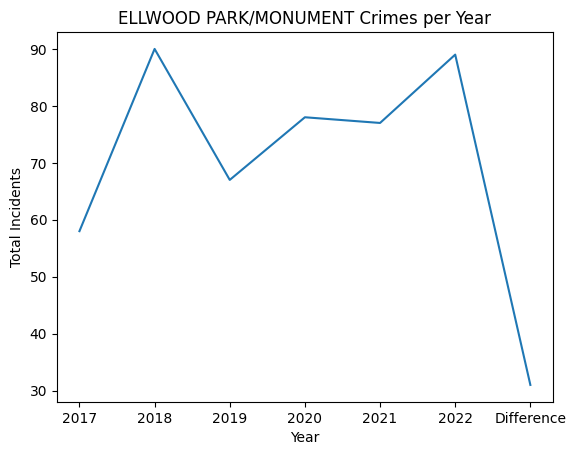

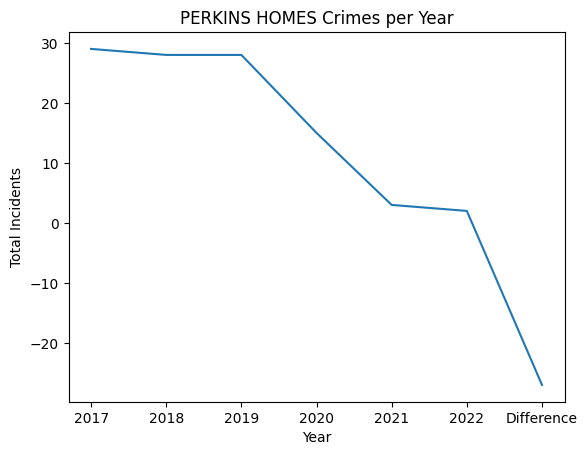

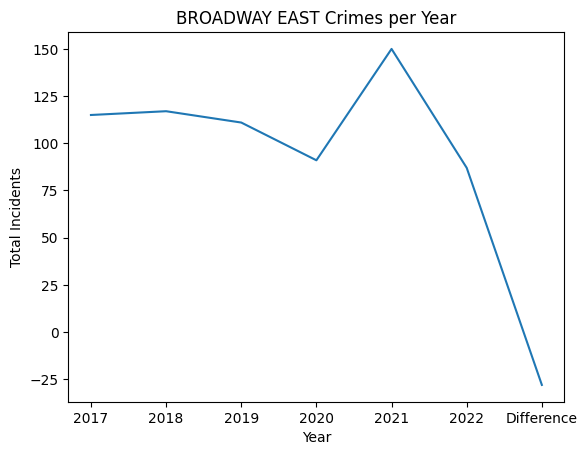

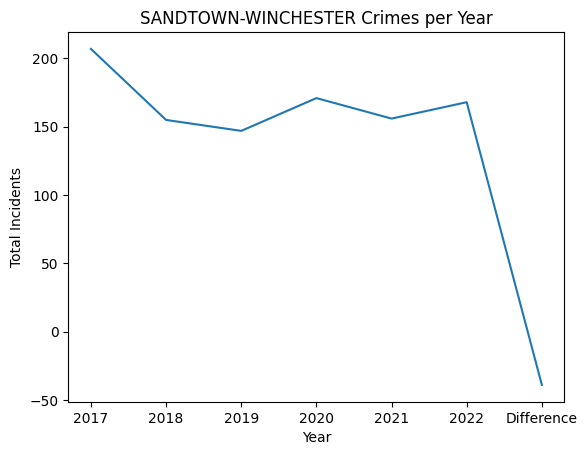

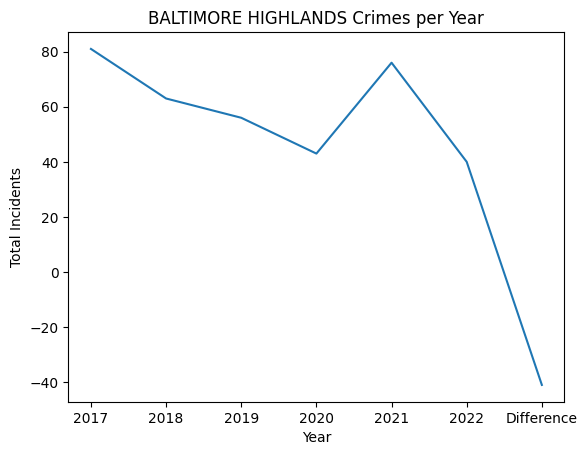

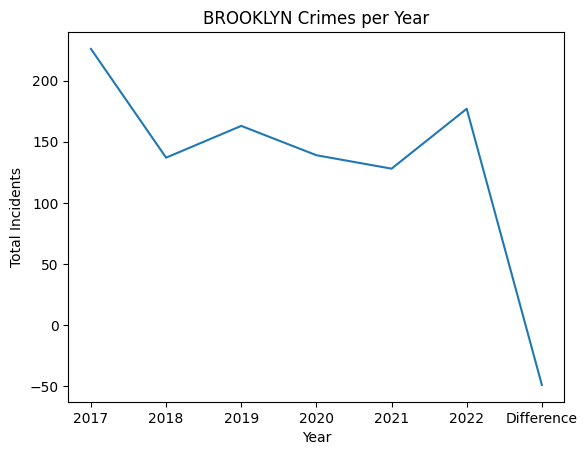

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Create list of selected neighborhoods
selected_neighborhoods = list(top_5_neighborhoods.index) + list(bottom_5_neighborhoods.index)

# Create dataframe with counts for each year per neighborhood
counts_df = selected_neighborhood_counts_pivot

# Plot charts
for neighborhood in selected_neighborhoods:

    # Extract data
    data = counts_df.loc[neighborhood]

    # Plot line chart
    data.plot(kind='line')

    # Customize chart
    plt.title(f'{neighborhood} Crimes per Year')
    plt.xlabel('Year')
    plt.ylabel('Total Incidents')
    plt.show()


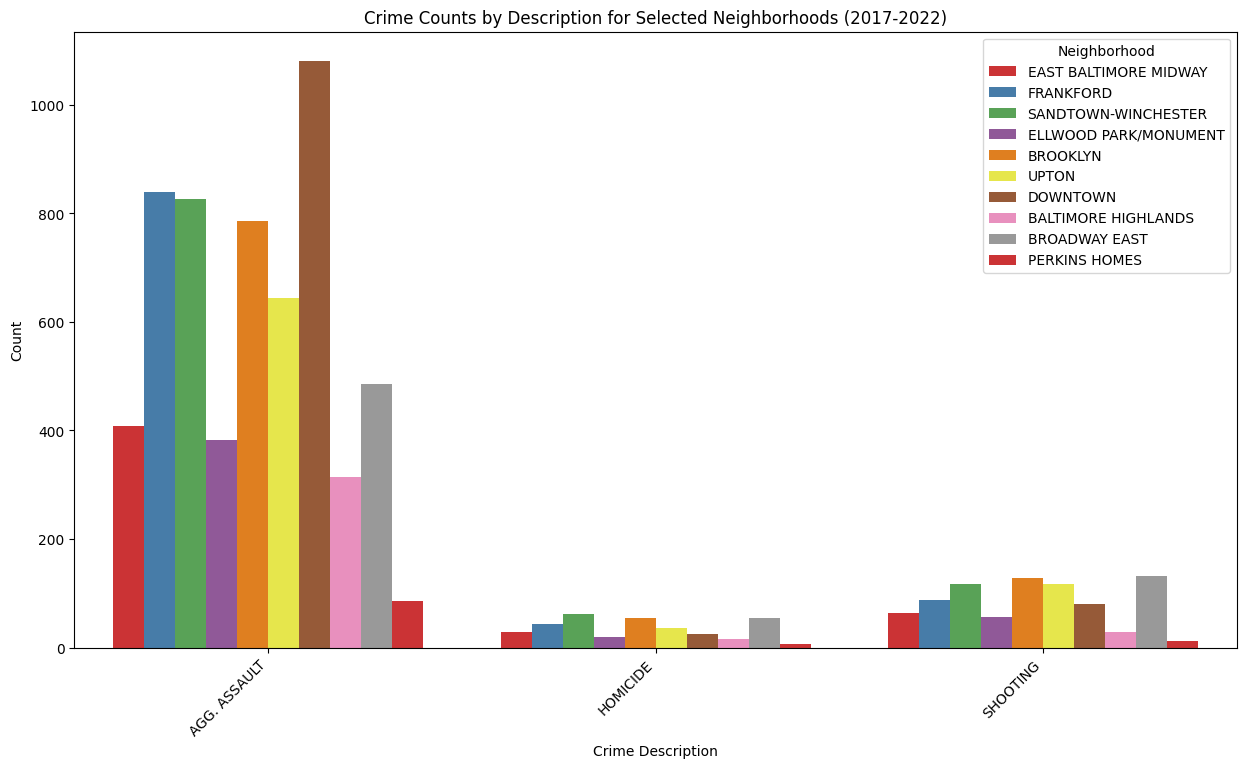

In [18]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Description', hue='Neighborhood', data=selected_neighborhood_data, palette='Set1')
plt.title('Crime Counts by Description for Selected Neighborhoods (2017-2022)')
plt.xlabel('Crime Description')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Neighborhood')
plt.show()


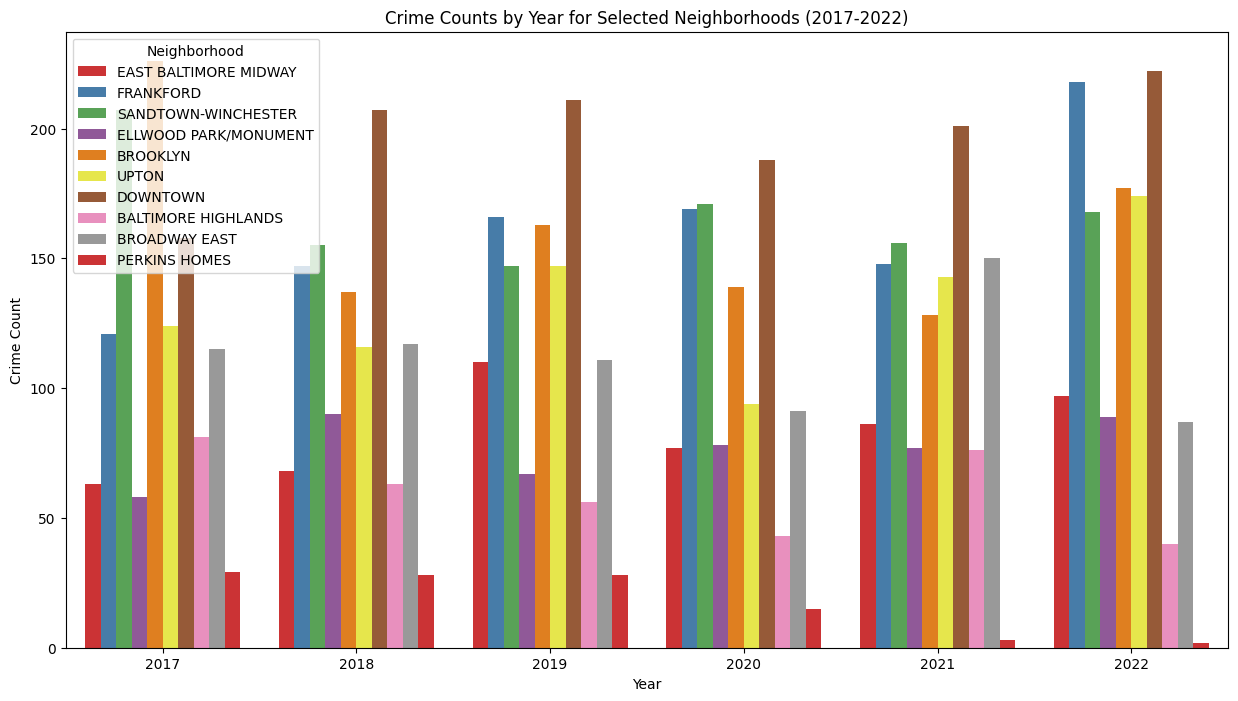

In [19]:
plt.figure(figsize=(15, 8))
sns.countplot(x='Year', hue='Neighborhood', data=selected_neighborhood_data, palette='Set1')
plt.title('Crime Counts by Year for Selected Neighborhoods (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Crime Count')
plt.show()

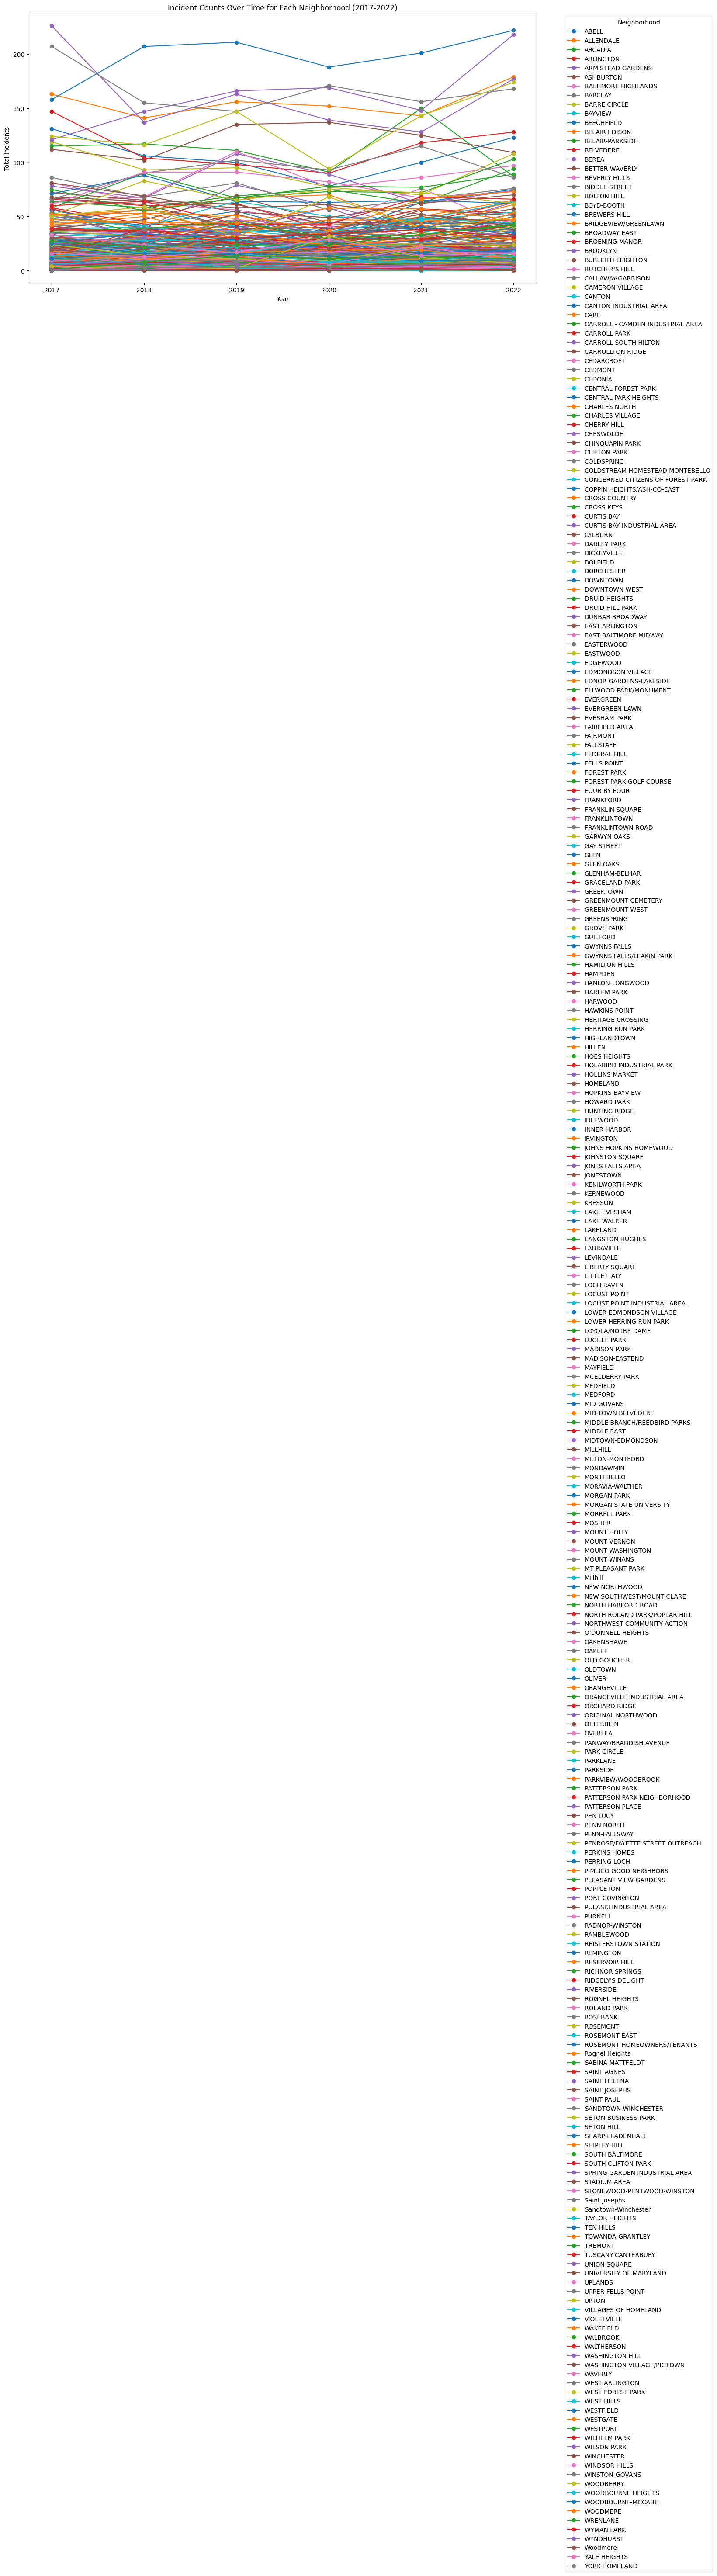

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded and processed your data
# using the code provided in the previous responses

# Group data by year, neighborhood, and count incidents
neighborhood_counts = df.groupby(['Year', 'Neighborhood']).size().reset_index(name='Total_Incidents')

# Pivot the table to have years as columns
neighborhood_counts_pivot = neighborhood_counts.pivot(index='Neighborhood', columns='Year', values='Total_Incidents').fillna(0)

# Create a line plot for each neighborhood
plt.figure(figsize=(15, 8))
for neighborhood in neighborhood_counts_pivot.index:
    plt.plot(neighborhood_counts_pivot.columns, neighborhood_counts_pivot.loc[neighborhood], label=neighborhood, marker='o')

plt.title('Incident Counts Over Time for Each Neighborhood (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset.csv' with the actual file name)
file_path = '/content/drive/MyDrive/Part_1_Crime_Data.csv'
df = pd.read_csv(file_path, parse_dates=['CrimeDateTime'])



<ipython-input-22-a6fbfdf5c518>:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, parse_dates=['CrimeDateTime'])


In [23]:
# Filter relevant columns
columns_of_interest = ['RowID', 'CCNumber', 'CrimeDateTime', 'CrimeCode', 'Description', 'Inside_Outside',
                        'Weapon', 'Post', 'Gender', 'Age', 'Race', 'Ethnicity', 'Location', 'Old_District',
                        'New_District', 'Neighborhood', 'Latitude', 'Longitude', 'GeoLocation', 'PremiseType']

df = df[columns_of_interest]

df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'], errors = 'coerce').dt.strftime('%m%Y')
df['CrimeDateTime'] = df['CrimeDateTime'].fillna(0)
df['Year'] = pd.to_datetime(df['CrimeDateTime']).dt.strftime('%Y').astype(int)

df = df[(df['Year'] >= 2017)& (df['Year'] <= 2022) ]

# Group data by year and calculate citywide counts
citywide_counts = df.groupby('Year').size().reset_index(name='City_Total_Incidents')

In [24]:
# Calculate differences
citywide_counts['Difference'] = citywide_counts['City_Total_Incidents'].diff().fillna(0)
print(citywide_counts)

   Year  City_Total_Incidents  Difference
0  2017                  6809         0.0
1  2018                  6532      -277.0
2  2019                  6745       213.0
3  2020                  6314      -431.0
4  2021                  6683       369.0
5  2022                  7138       455.0


In [25]:
# Calculate percentage change
citywide_counts['PercentageChange'] = (citywide_counts['Difference'] /
                                citywide_counts['City_Total_Incidents'].shift(1)) * 100
print(citywide_counts['PercentageChange'])

0         NaN
1   -4.068145
2    3.260870
3   -6.389918
4    5.844156
5    6.808320
Name: PercentageChange, dtype: float64


In [26]:
print("Citywide Analysis:")
print(citywide_counts[['Difference', 'PercentageChange',]])

Citywide Analysis:
   Difference  PercentageChange
0         0.0               NaN
1      -277.0         -4.068145
2       213.0          3.260870
3      -431.0         -6.389918
4       369.0          5.844156
5       455.0          6.808320


In [27]:
# Sort neighborhoods based on the difference
sorted_neighborhoods = citywide_counts.sort_values(by='Difference', ascending=False)

# Select top 5 and bottom 5 neighborhoods
top_5_neighborhoods = sorted_neighborhoods.head(5)
bottom_5_neighborhoods = sorted_neighborhoods.tail(5)

# Display summary tables for top and bottom neighborhoods
print("Top 5 Neighborhoods with Highest Increase:")
print(top_5_neighborhoods[['Year', 'City_Total_Incidents', 'Difference', 'PercentageChange']])

print("\nTop 5 Neighborhoods with Highest Decrease:")
print(bottom_5_neighborhoods[['Year', 'City_Total_Incidents', 'Difference', 'PercentageChange']])



Top 5 Neighborhoods with Highest Increase:
   Year  City_Total_Incidents  Difference  PercentageChange
5  2022                  7138       455.0          6.808320
4  2021                  6683       369.0          5.844156
2  2019                  6745       213.0          3.260870
0  2017                  6809         0.0               NaN
1  2018                  6532      -277.0         -4.068145

Top 5 Neighborhoods with Highest Decrease:
   Year  City_Total_Incidents  Difference  PercentageChange
4  2021                  6683       369.0          5.844156
2  2019                  6745       213.0          3.260870
0  2017                  6809         0.0               NaN
1  2018                  6532      -277.0         -4.068145
3  2020                  6314      -431.0         -6.389918


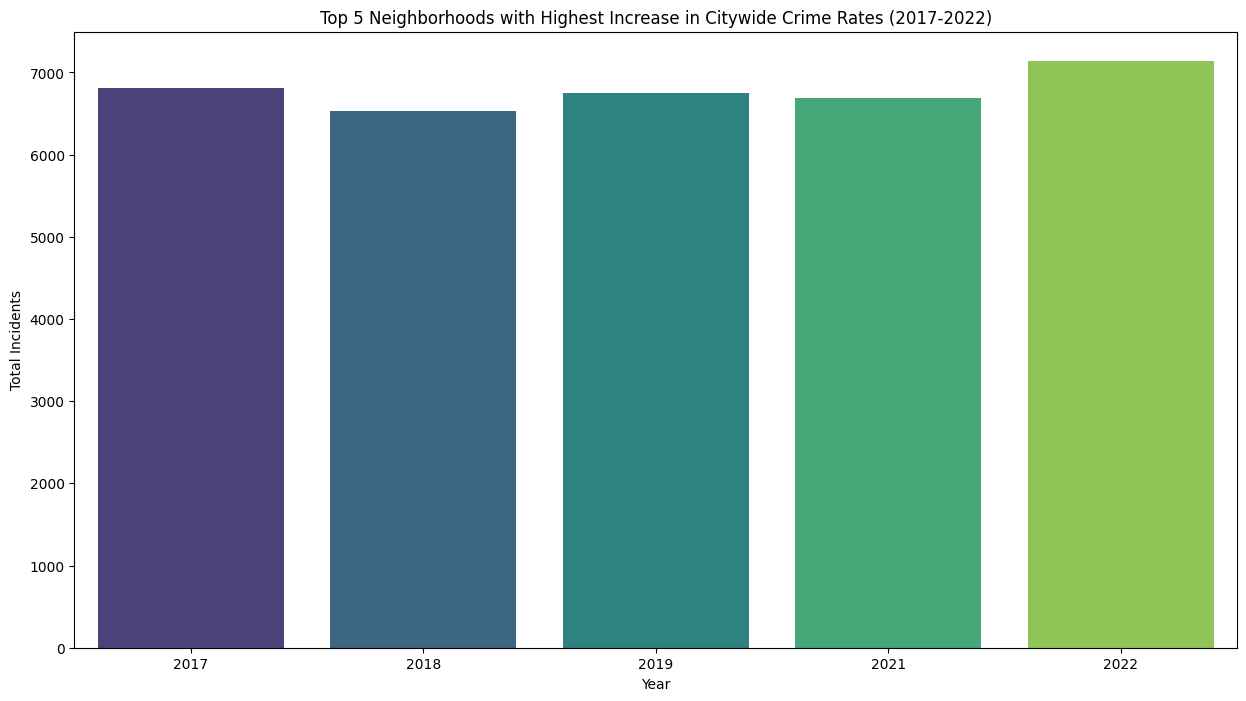

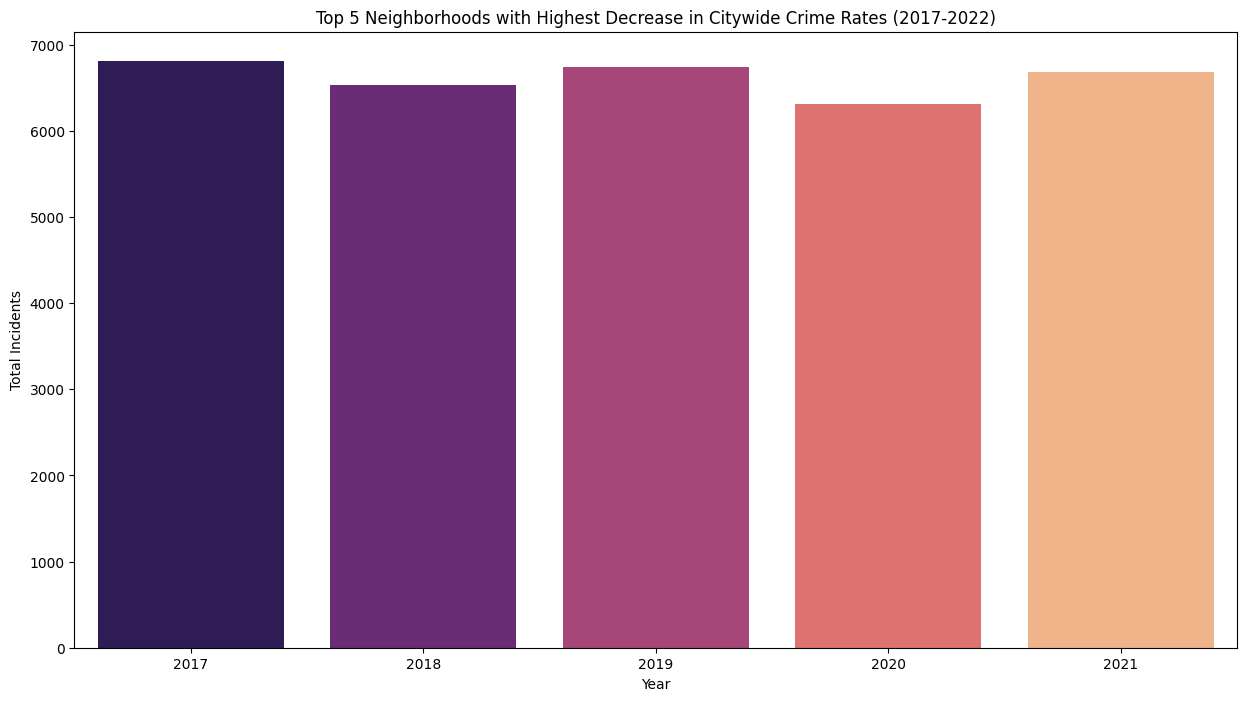

In [28]:
# Create visualizations for top and bottom neighborhoods
plt.figure(figsize=(15, 8))
sns.barplot(x='Year', y='City_Total_Incidents', data=top_5_neighborhoods, palette='viridis')
plt.title('Top 5 Neighborhoods with Highest Increase in Citywide Crime Rates (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()

plt.figure(figsize=(15, 8))
sns.barplot(x='Year', y='City_Total_Incidents', data=bottom_5_neighborhoods, palette='magma')
plt.title('Top 5 Neighborhoods with Highest Decrease in Citywide Crime Rates (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()

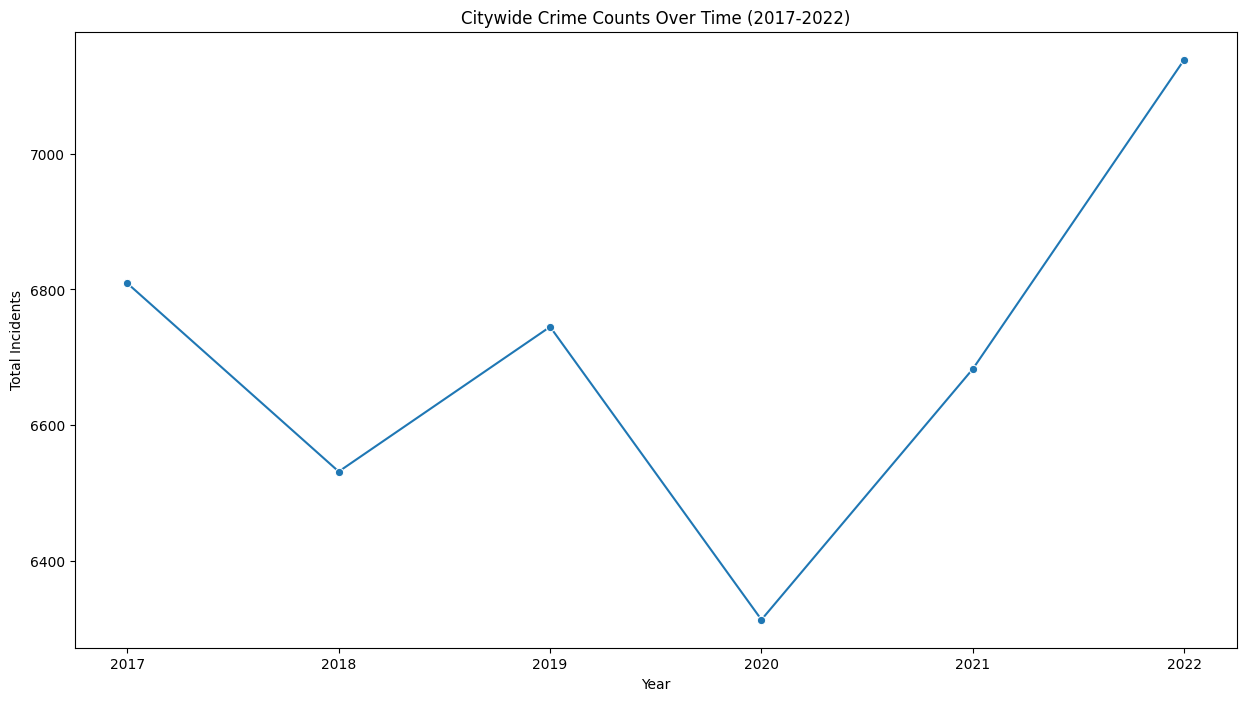

In [29]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


In [31]:
vacant_building_notices = pd.read_csv('/content/drive/MyDrive/1)Vacant_Building_Notices.csv', usecols=['X', 'Y', 'OBJECTID','NoticeNum','DateNotice','DateCancel','DateAbate','NT','OWNER_ABBR','HousingMarketTypology2017','Council_District','Neighborhood','BLOCKLOT','Address'])

vacant_building_notices['DateNotice'] = pd.to_datetime(vacant_building_notices['DateNotice'], errors = 'coerce').dt.strftime('%m%Y')
vacant_building_notices['DateNotice'] = vacant_building_notices['DateNotice'].fillna(0)
vacant_building_notices['NoticeYear'] = pd.to_datetime(vacant_building_notices['DateNotice']).dt.strftime('%Y').astype(int)
vacant_building_notices = vacant_building_notices[(vacant_building_notices['NoticeYear'] >= 2017)& (vacant_building_notices['NoticeYear'] <= 2022)]
vacant_building_notices

grouped_by_vacant_notice = vacant_building_notices.groupby(['Neighborhood','NoticeYear'])['OBJECTID'].count().reset_index(name = 'vacant_count').sort_values(by='vacant_count', ascending = False)
grouped_by_vacant_notice

vacant_notice_vs_year = grouped_by_vacant_notice.pivot(index='Neighborhood', columns='NoticeYear', values='vacant_count')
vacant_notice_vs_year = vacant_notice_vs_year.dropna()
vacant_notice_vs_year["difference_of_vancant"] = vacant_notice_vs_year[2022] - vacant_notice_vs_year[2017]
vacant_notice_vs_year = vacant_notice_vs_year.sort_values(by = "difference_of_vancant", ascending = False)
vacant_notice_vs_year

NoticeYear                                 2017  2018  2019  2020  2021  2022  \
Neighborhood                                                                    
EAST BALTIMORE MIDWAY                      16.0  12.0  16.0  24.0  22.0  55.0   
CARROLLTON RIDGE                           36.0  32.0  43.0  50.0  74.0  74.0   
BROADWAY EAST                              29.0  30.0  48.0  37.0  61.0  64.0   
OLIVER                                     22.0  16.0  24.0  15.0  24.0  46.0   
BROOKLYN                                    6.0  13.0  15.0  18.0  23.0  29.0   
...                                         ...   ...   ...   ...   ...   ...   
FRANKLINTOWN ROAD                          10.0  10.0   9.0   7.0   9.0   8.0   
WINCHESTER                                  7.0   7.0   5.0   4.0   4.0   4.0   
BIDDLE STREET                              12.0   8.0   8.0   4.0   6.0   8.0   
SHIPLEY HILL                               20.0   4.0  25.0  16.0  17.0  12.0   
SANDTOWN-WINCHESTER                        48.0  42.0  48.0  28.0  53.0  18.0   

NoticeYear                                 difference_of_vancant  
Neighborhood                                                      
EAST BALTIMORE MIDWAY                                       39.0  
CARROLLTON RIDGE                                            38.0  
BROADWAY EAST                                               35.0  
OLIVER                                                      24.0  
BROOKLYN                                                    23.0  
...                                                          ...  
FRANKLINTOWN ROAD                                           -2.0  
WINCHESTER                                                  -3.0  
BIDDLE STREET                                               -4.0  
SHIPLEY HILL                                                -8.0  
SANDTOWN-WINCHESTER                                        -30.0  

[76 rows x 7 columns]

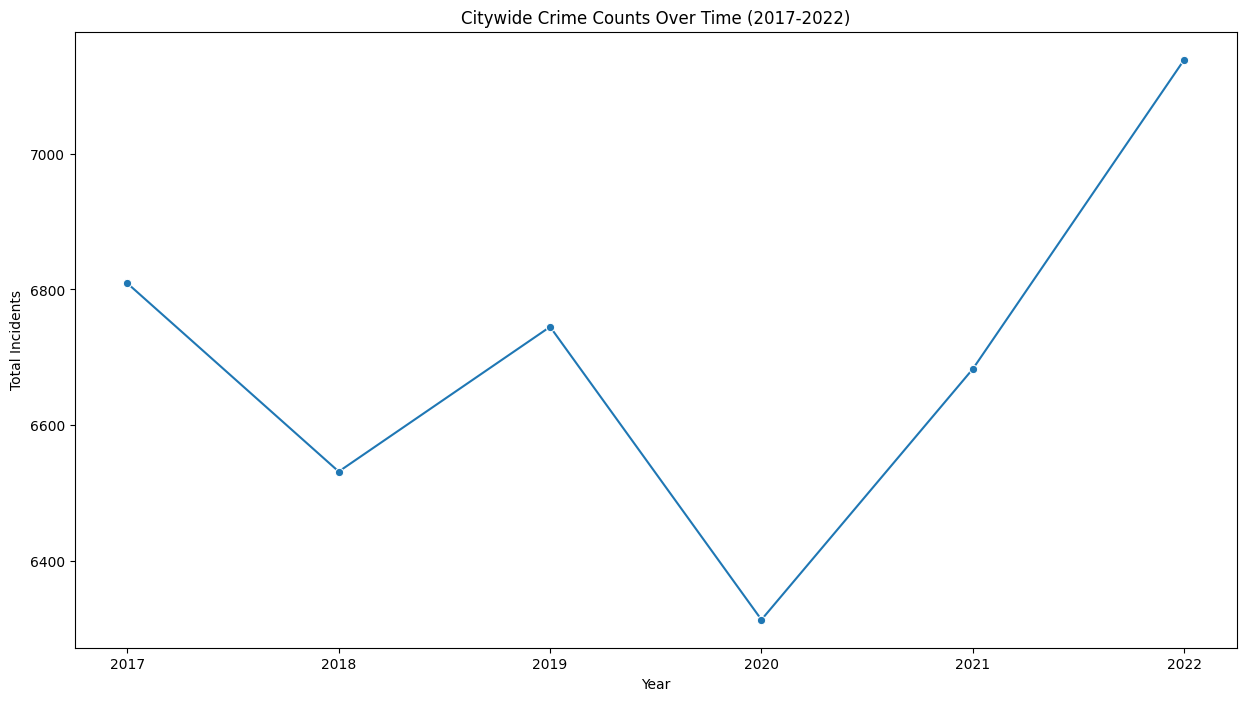

In [32]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


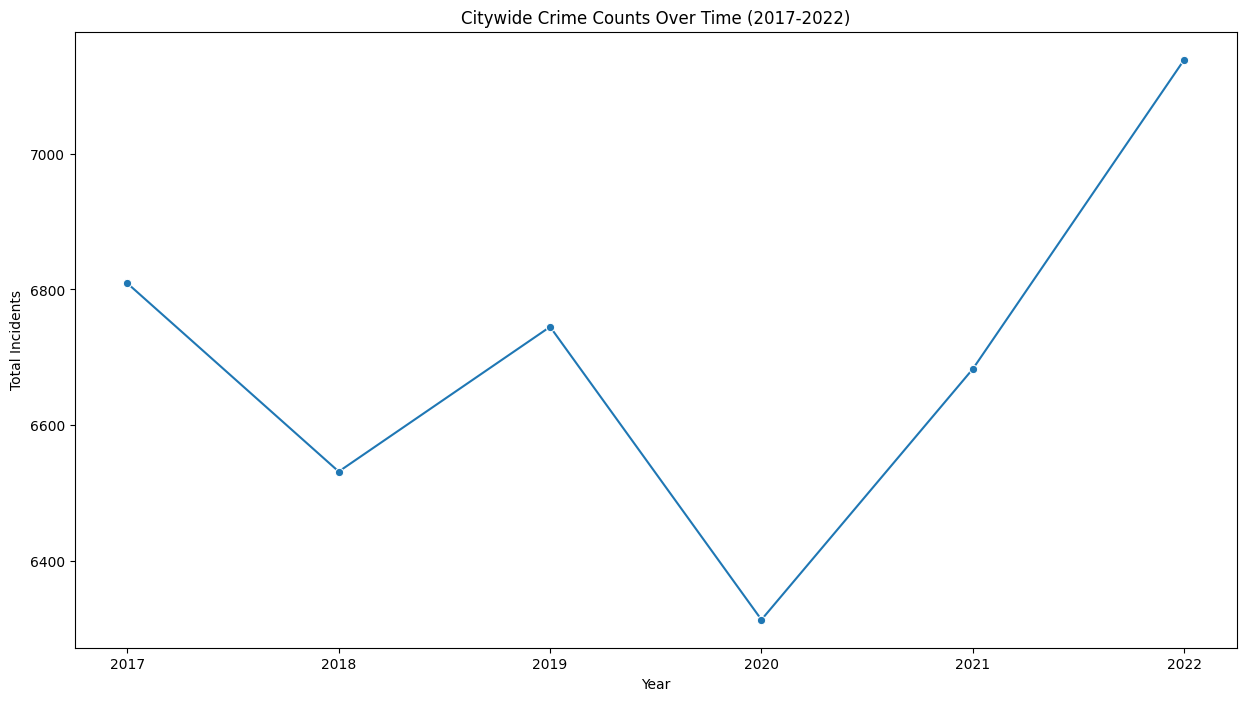

In [33]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


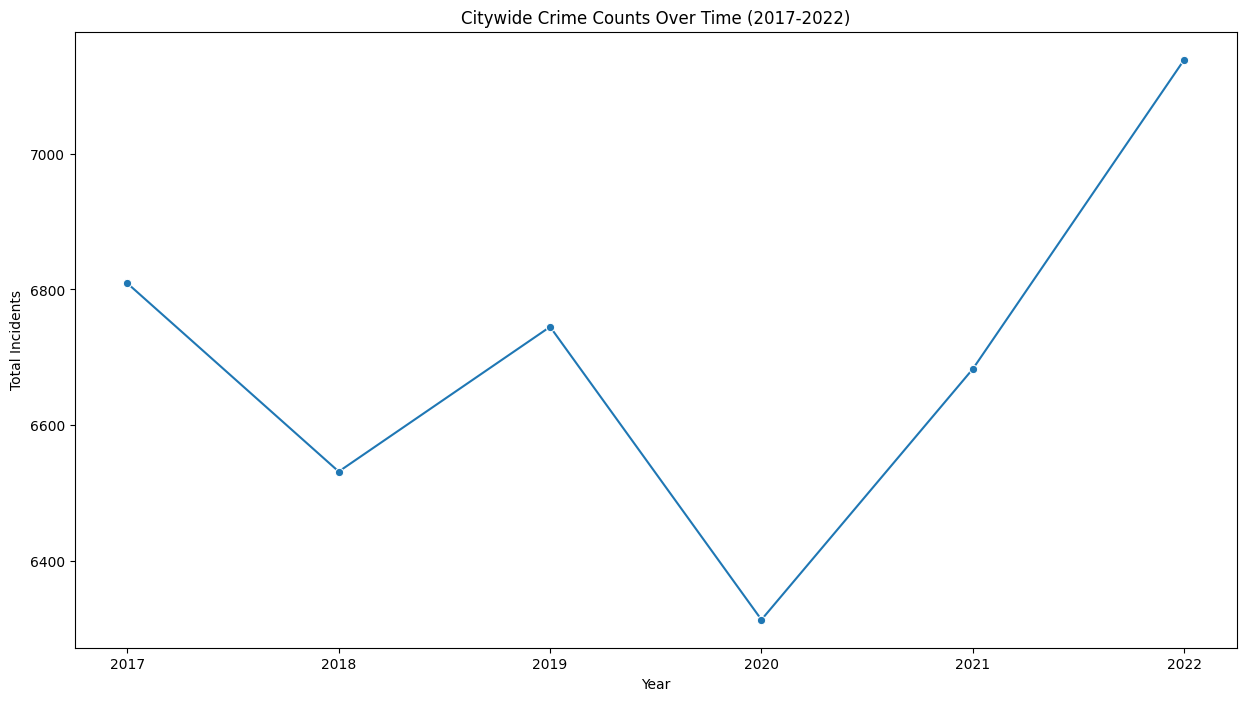

In [34]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


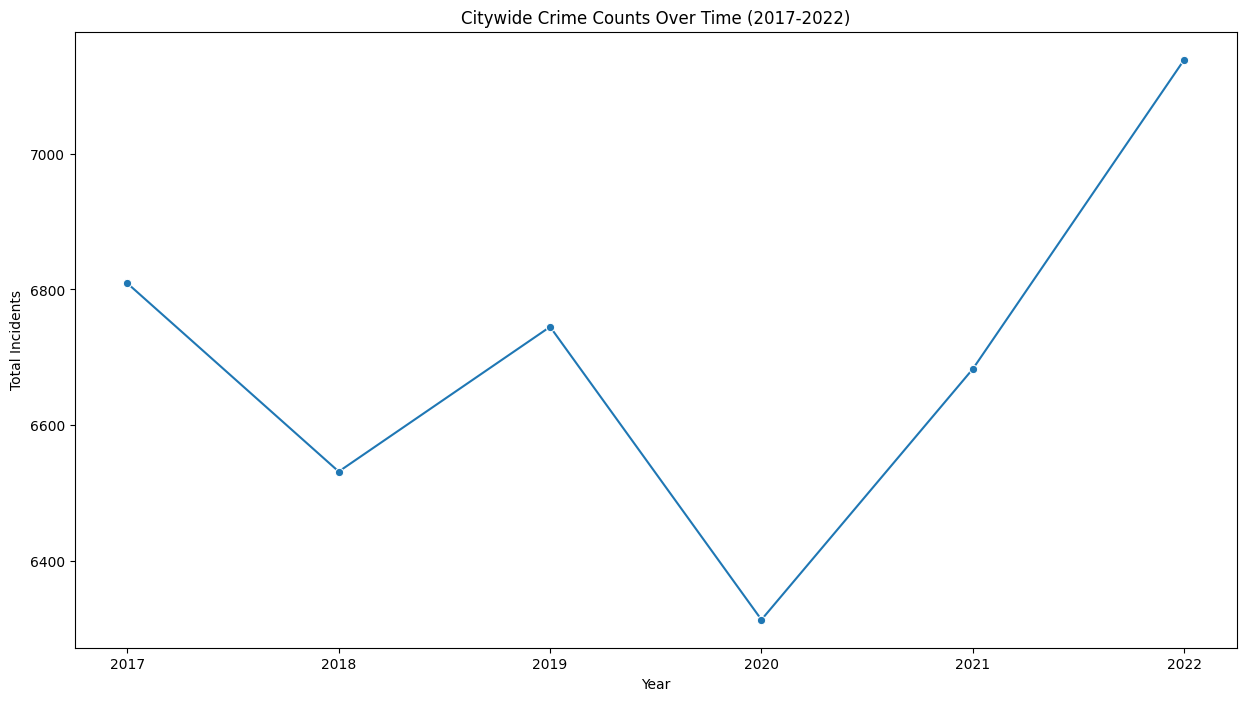

In [35]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


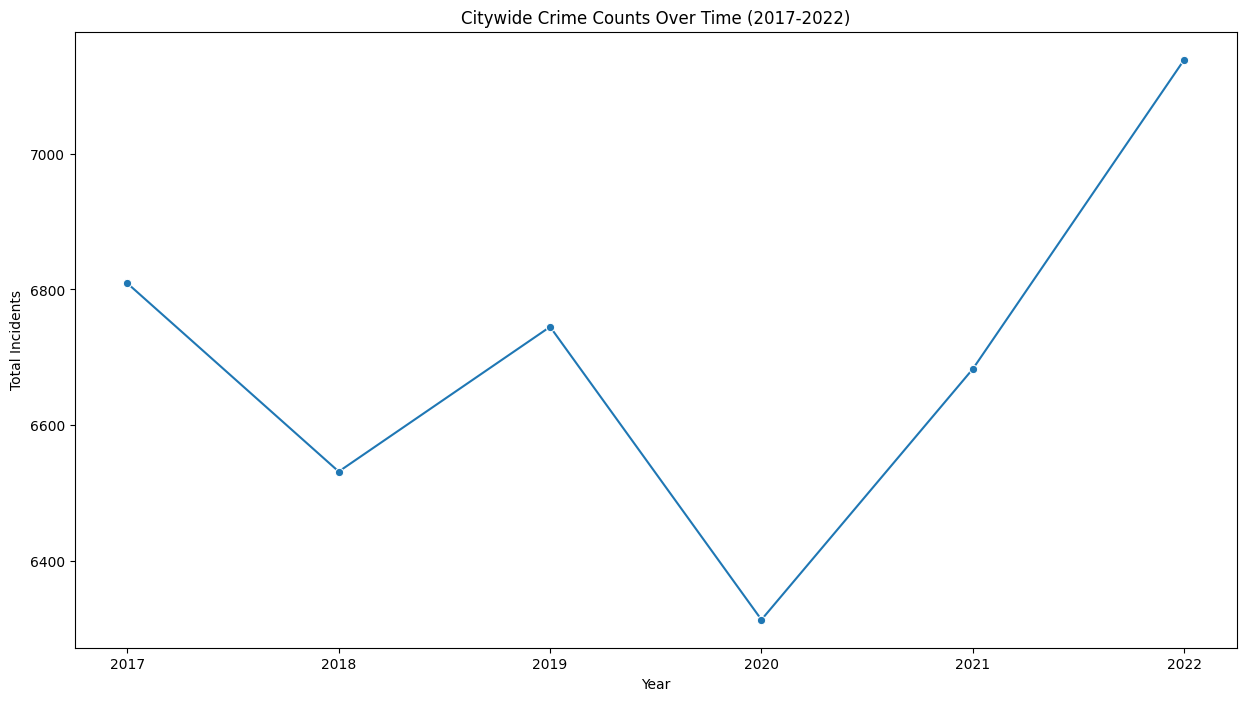

In [36]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


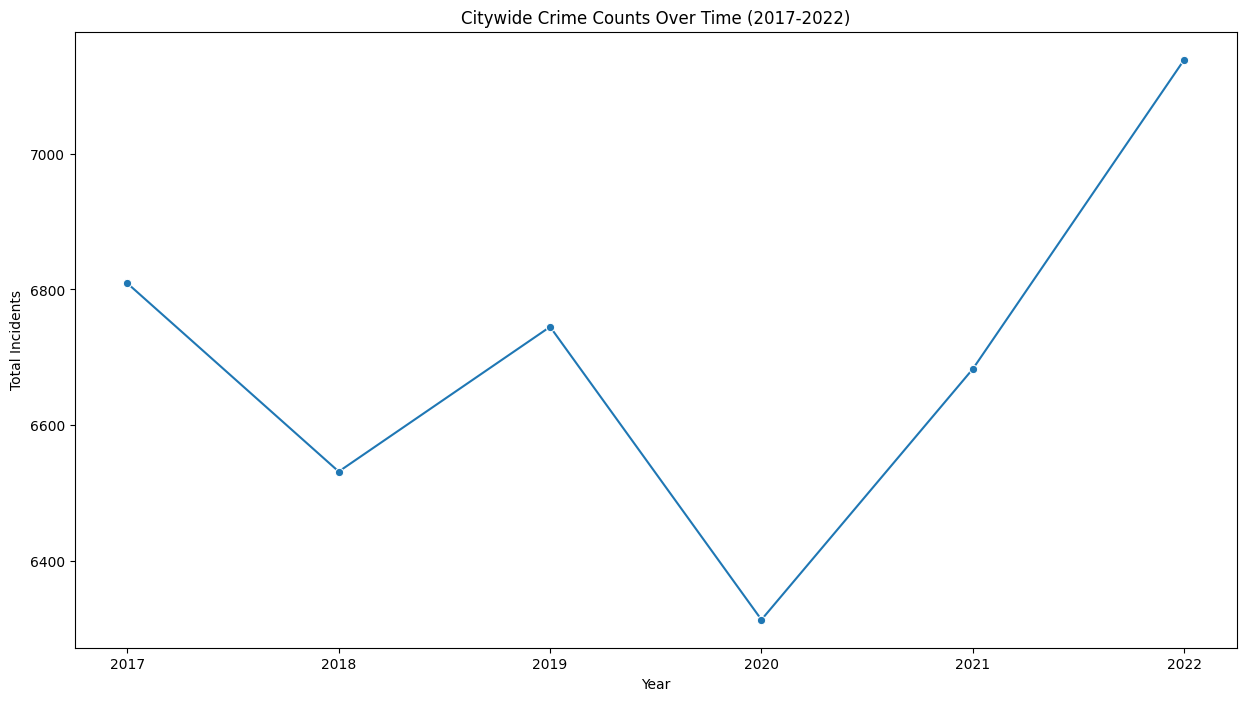

In [37]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


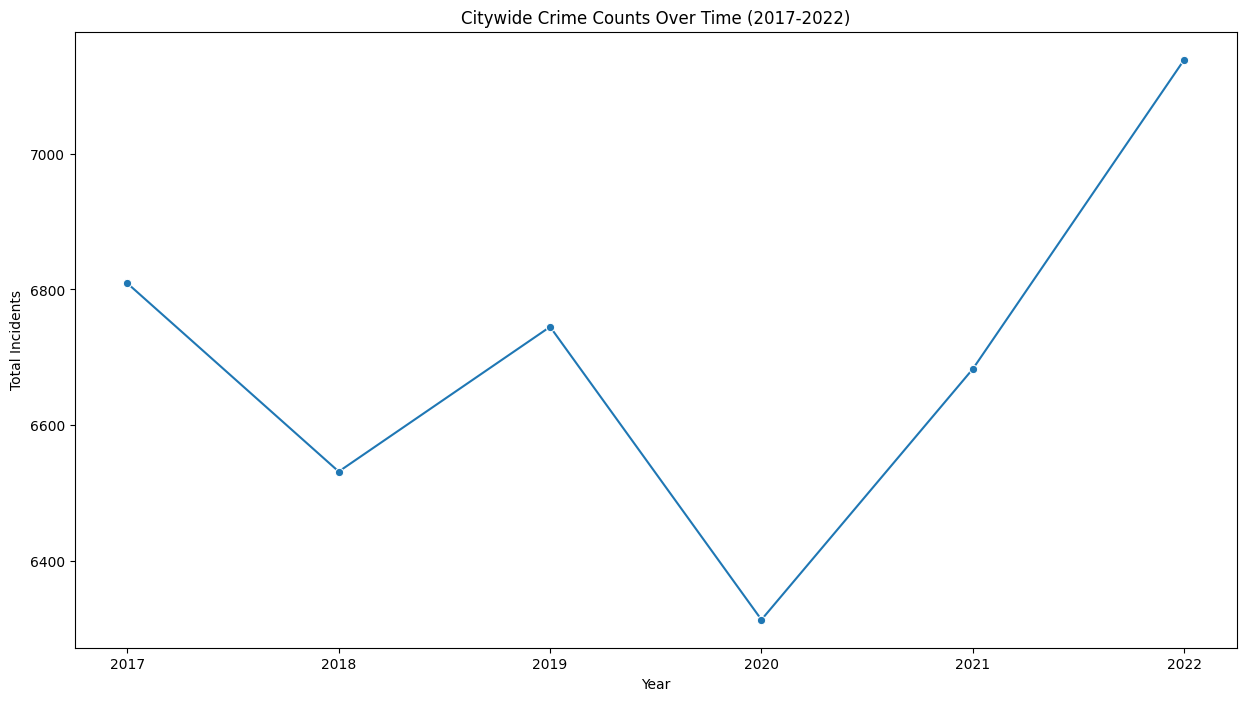

In [38]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


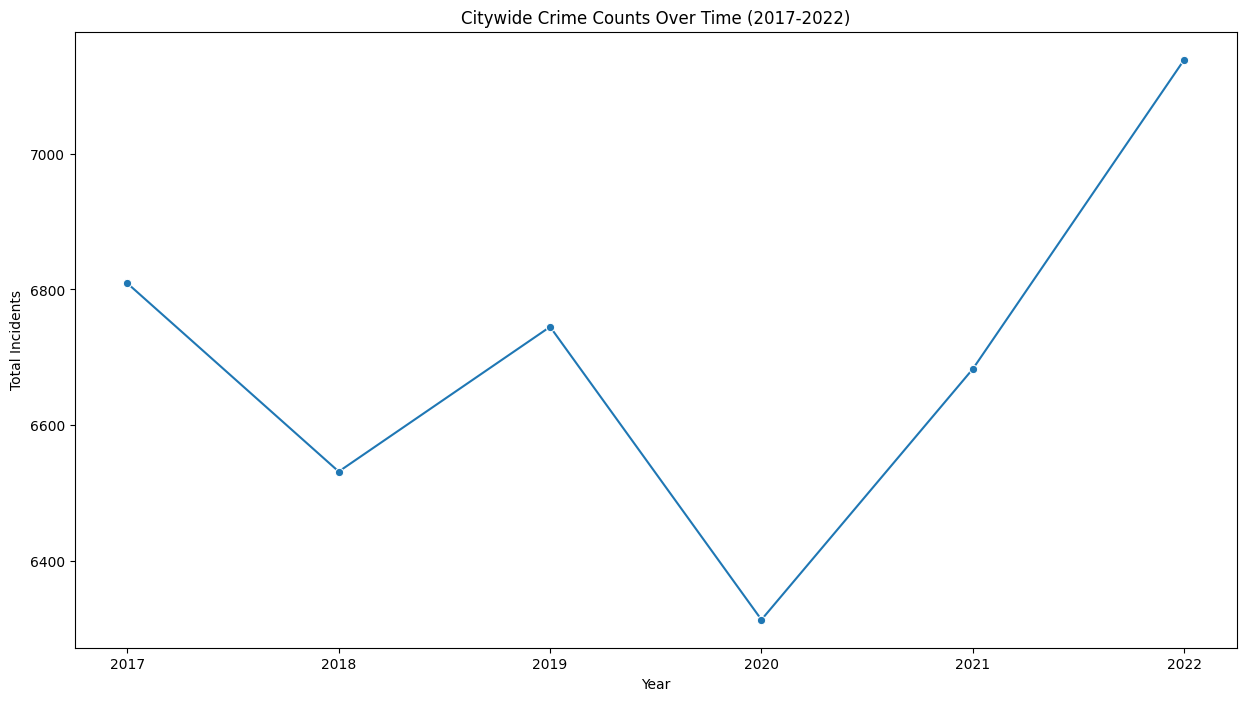

In [39]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


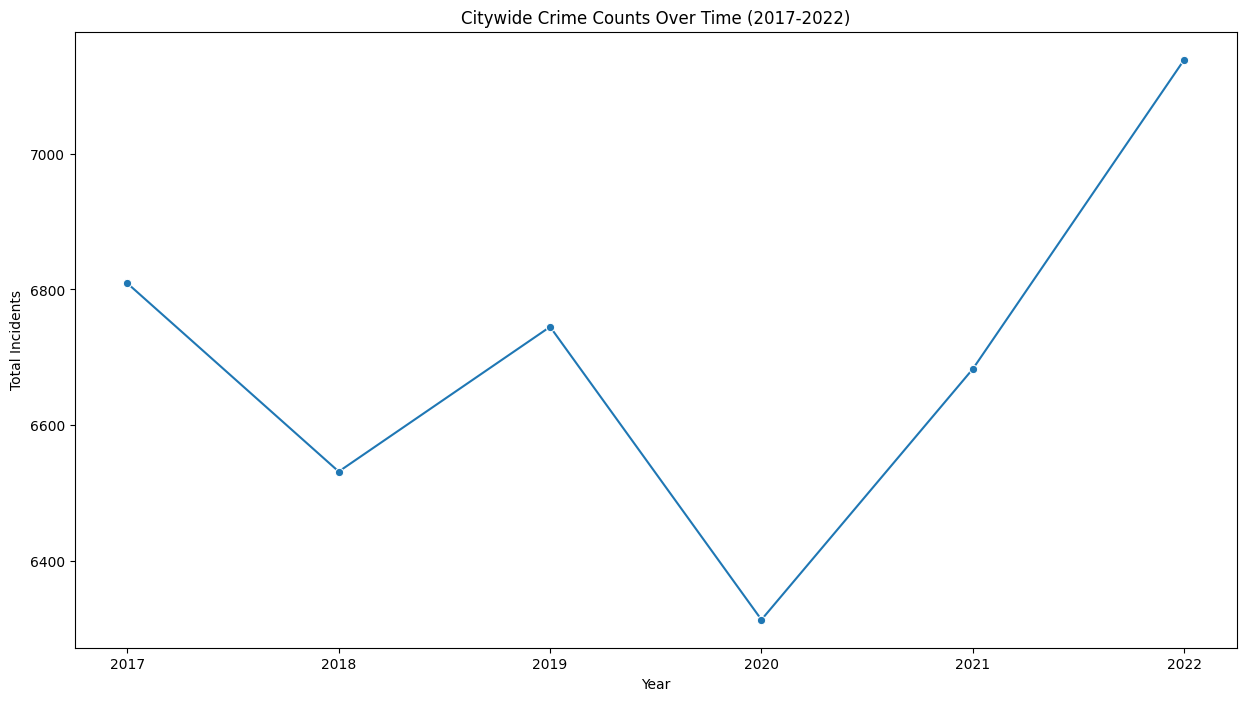

In [40]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


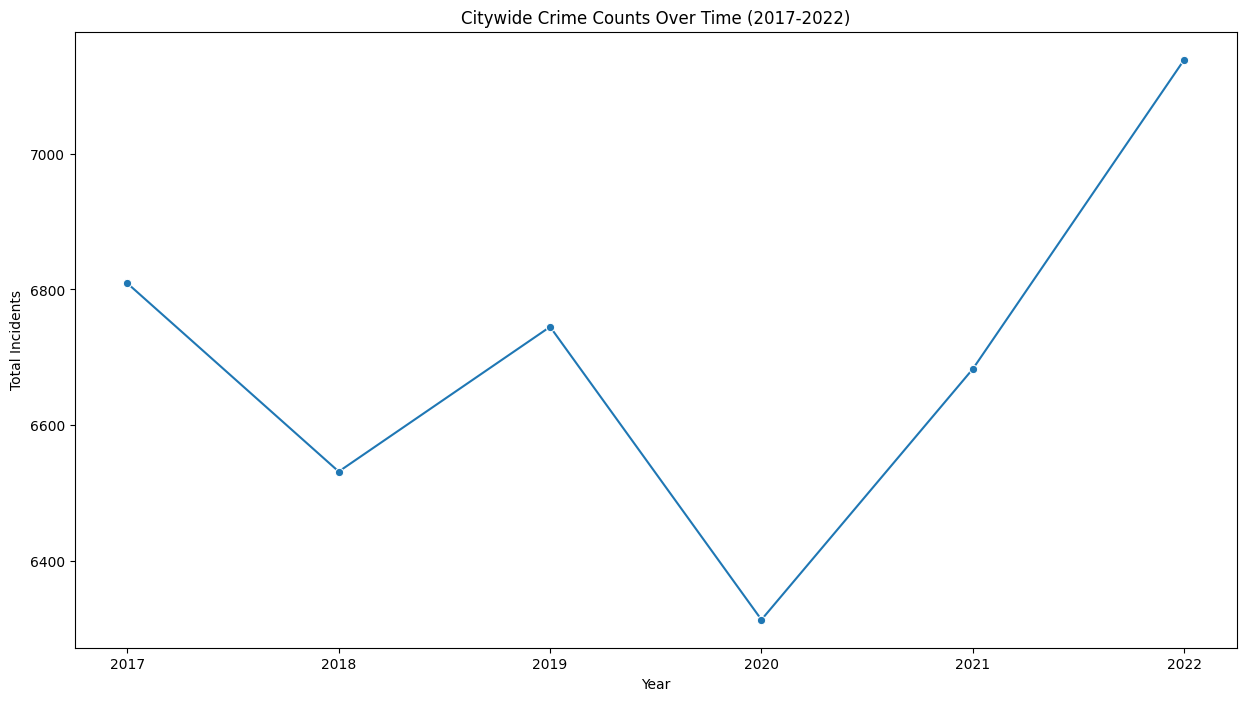

In [41]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


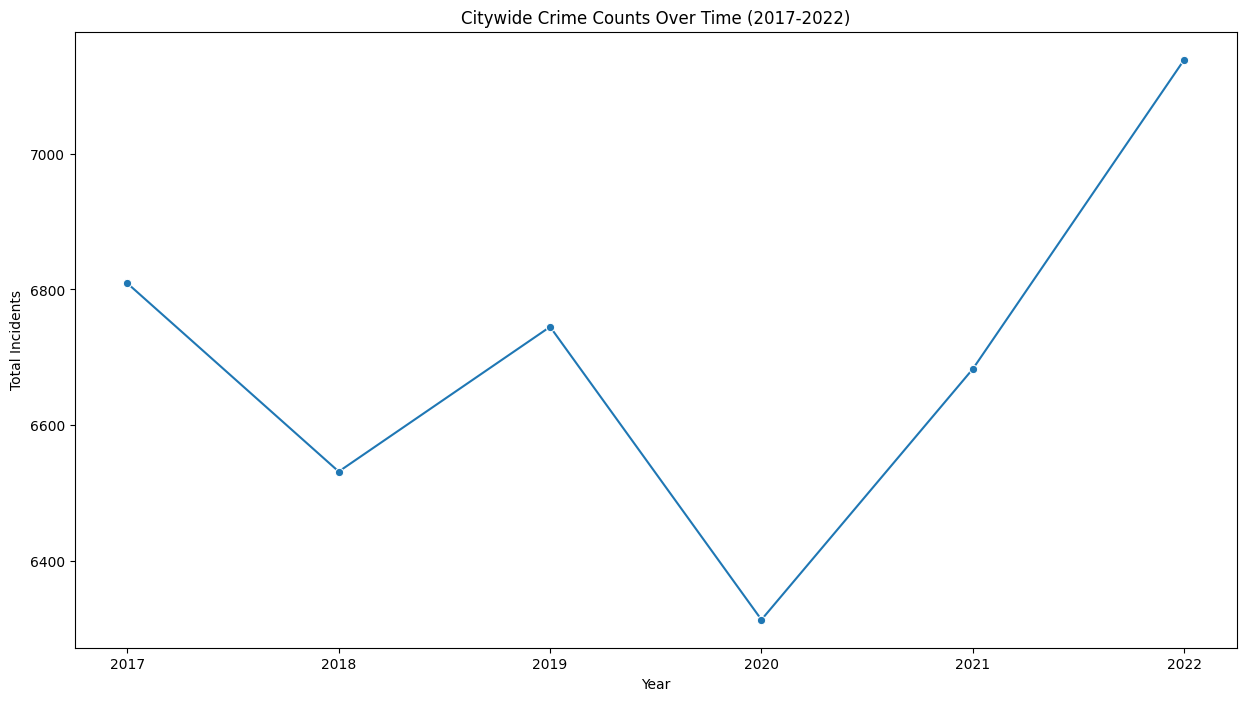

In [42]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


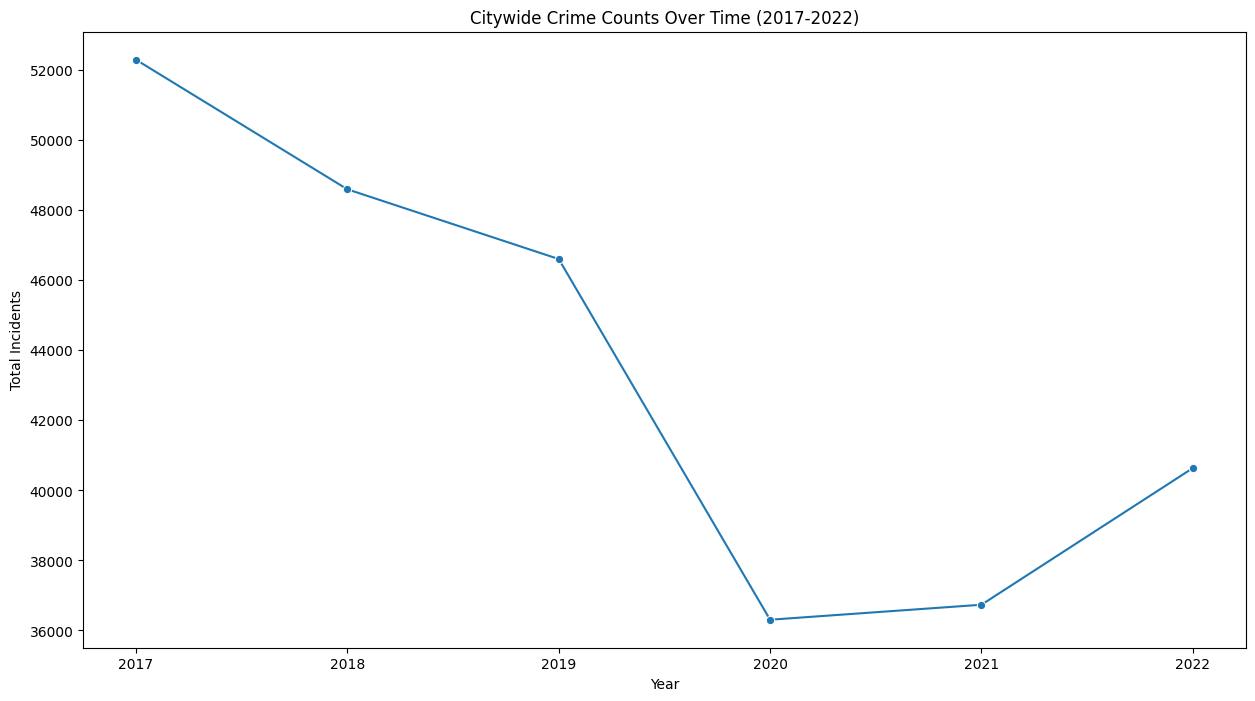

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


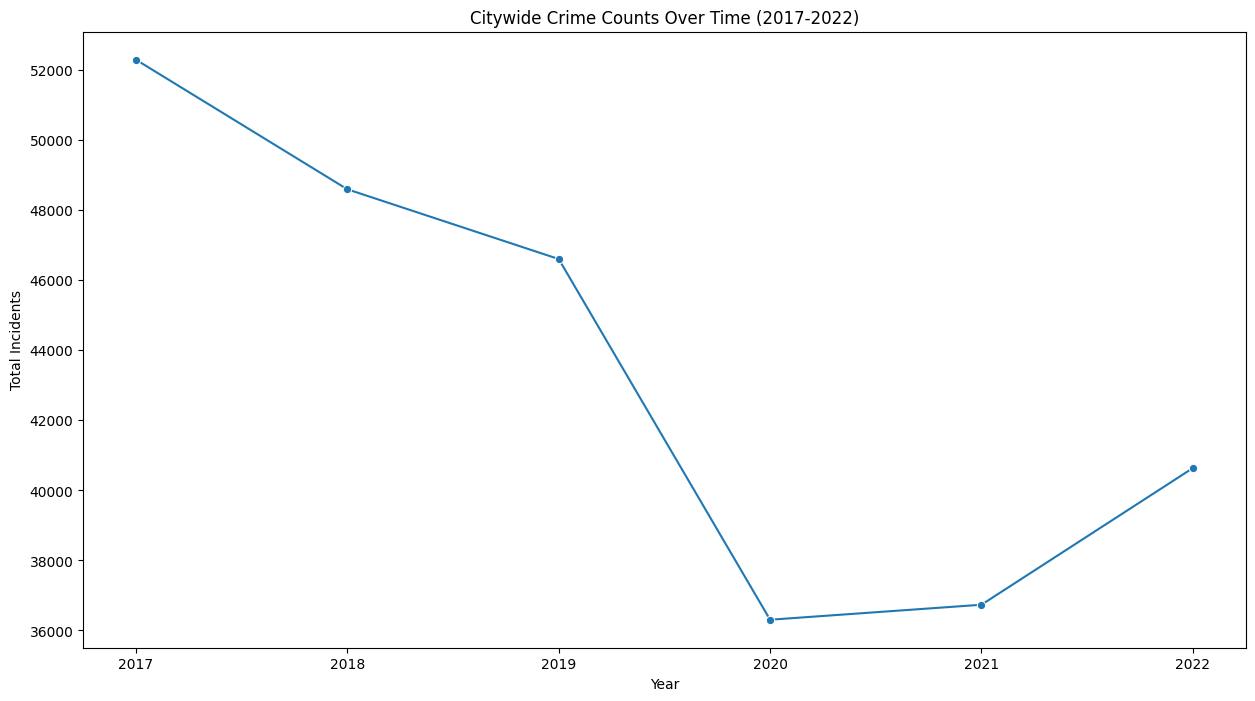

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


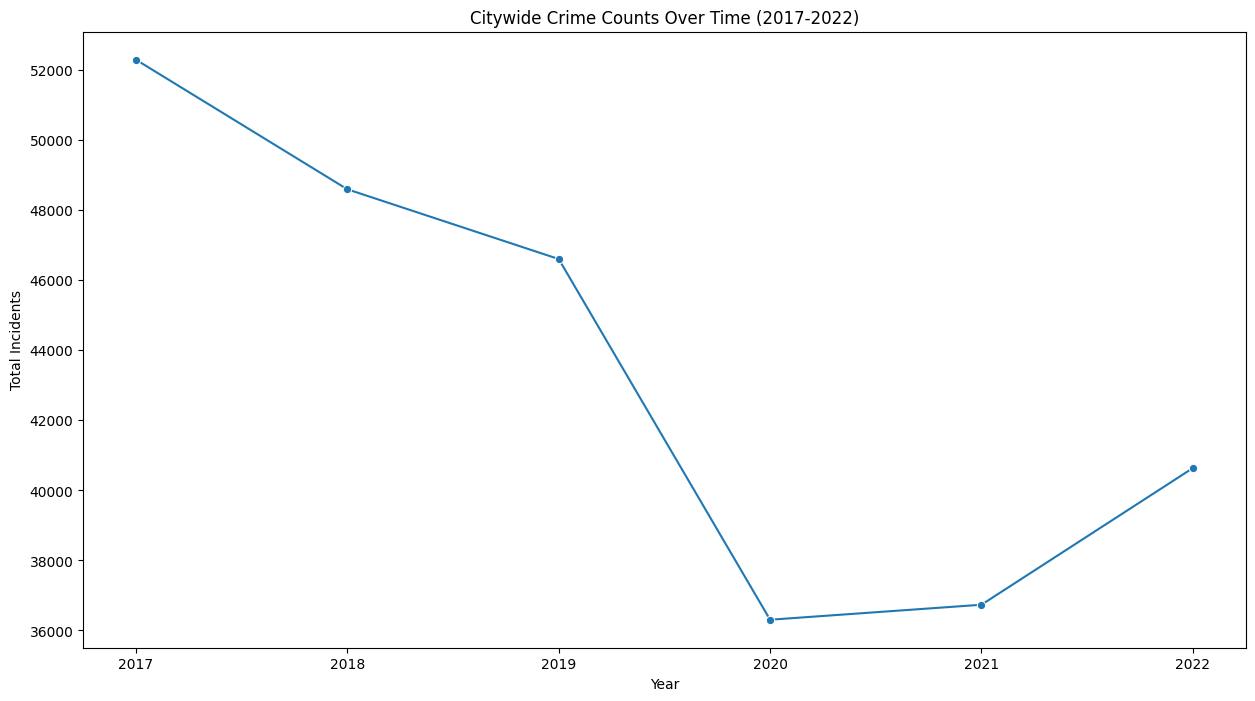

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


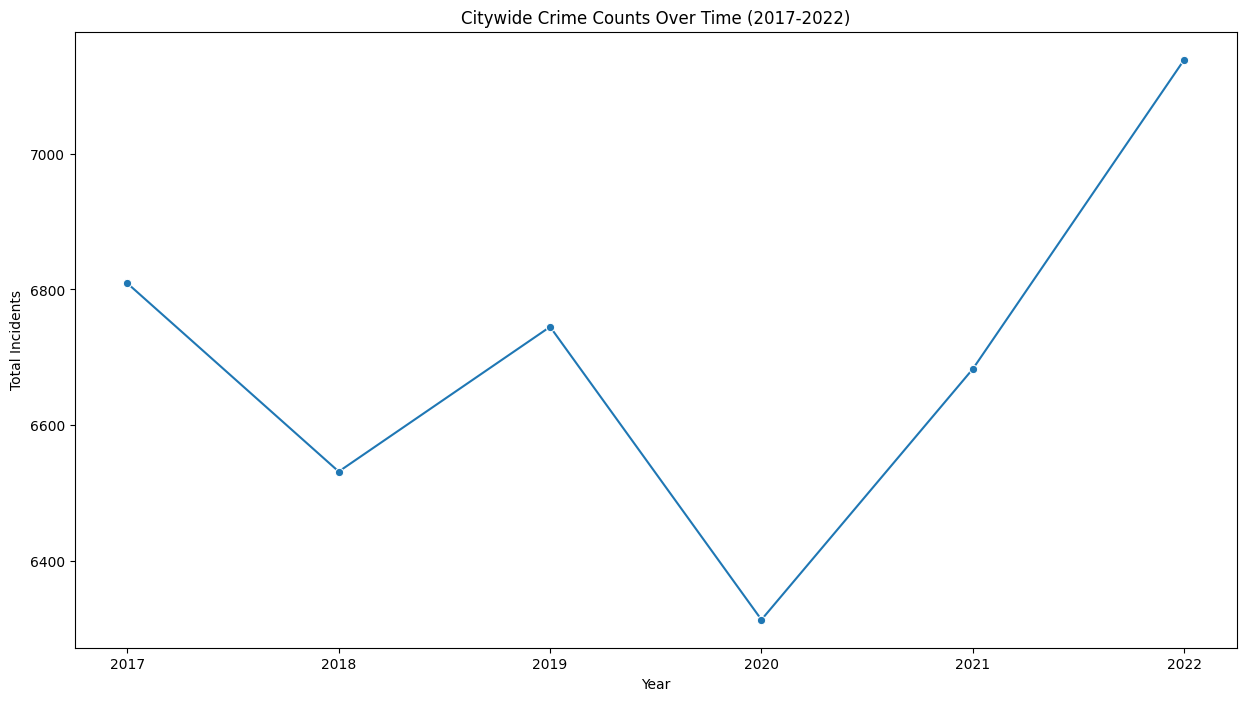

In [44]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='City_Total_Incidents', data=citywide_counts, marker='o')
plt.title('Citywide Crime Counts Over Time (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.show()


In [43]:
crime_vs_year

Year                    2017   2018   2019   2020   2021   2022  Difference  \
Neighborhood                                                                  
FRANKFORD              121.0  147.0  166.0  169.0  148.0  218.0        97.0   
DOWNTOWN               158.0  207.0  211.0  188.0  201.0  222.0        64.0   
UPTON                  124.0  116.0  147.0   94.0  143.0  174.0        50.0   
EAST BALTIMORE MIDWAY   63.0   68.0  110.0   77.0   86.0   97.0        34.0   
ELLWOOD PARK/MONUMENT   58.0   90.0   67.0   78.0   77.0   89.0        31.0   
...                      ...    ...    ...    ...    ...    ...         ...   
PERKINS HOMES           29.0   28.0   28.0   15.0    3.0    2.0       -27.0   
BROADWAY EAST          115.0  117.0  111.0   91.0  150.0   87.0       -28.0   
SANDTOWN-WINCHESTER    207.0  155.0  147.0  171.0  156.0  168.0       -39.0   
BALTIMORE HIGHLANDS     81.0   63.0   56.0   43.0   76.0   40.0       -41.0   
BROOKLYN               226.0  137.0  163.0  139.0  128.0  177.0       -49.0   

Year                   PercentageChange  
Neighborhood                             
FRANKFORD                     80.165289  
DOWNTOWN                      40.506329  
UPTON                         40.322581  
EAST BALTIMORE MIDWAY         53.968254  
ELLWOOD PARK/MONUMENT         53.448276  
...                                 ...  
PERKINS HOMES                -93.103448  
BROADWAY EAST                -24.347826  
SANDTOWN-WINCHESTER          -18.840580  
BALTIMORE HIGHLANDS          -50.617284  
BROOKLYN                     -21.681416  

[278 rows x 8 columns]

In [45]:
crime_vs_year.drop([2017,2018,2019,2020,2021,2022,'PercentageChange'], inplace = True, axis = 1)
vacant_notice_vs_year.drop([2017,2018,2019,2020,2021,2022], axis = 1, inplace = True)
sorted_neighborhoods.rename({"Difference": "difference_of_crime"}, axis = 1 ,inplace = True)
grouped_df = crime_vs_year.merge(vacant_notice_vs_year, how = 'outer', on = 'Neighborhood')

grouped_df

Difference  difference_of_vancant
Neighborhood                                                                
FRANKFORD                                        97.0                    NaN
DOWNTOWN                                         64.0                    NaN
UPTON                                            50.0                    NaN
EAST BALTIMORE MIDWAY                            34.0                    NaN
ELLWOOD PARK/MONUMENT                            31.0                    NaN
...                                               ...                    ...
FRANKLINTOWN ROAD                                 NaN                   -2.0
WINCHESTER                                        NaN                   -3.0
BIDDLE STREET                                     NaN                   -4.0
SHIPLEY HILL                                      NaN                   -8.0
SANDTOWN-WINCHESTER                               NaN                  -30.0

[354 rows x 2 columns]

In [46]:
vacant_building_rehabs = pd.read_csv('/content/drive/MyDrive/2)Vacant_Building_Rehabs.csv', usecols=['X','Y','OBJECTID','Block','Lot','PermitNum','VBN','DateIssue','DateIssued','ExistingUse','ProposedUse','HousingMarketTypology2017','Council_District','Neighborhood','BLOCKLOT','Address','GlobalID'])

vacant_building_rehabs['DateIssue'] = pd.to_datetime(vacant_building_rehabs['DateIssue'], errors = 'coerce').dt.strftime('%m%Y')
vacant_building_rehabs['DateIssue'] = vacant_building_rehabs['DateIssue'].fillna(0)
vacant_building_rehabs['RehabsYear'] = pd.to_datetime(vacant_building_rehabs['DateIssue']).dt.strftime('%Y').astype(int)
vacant_building_rehabs = vacant_building_rehabs[(vacant_building_rehabs['RehabsYear'] >= 2017) & (vacant_building_rehabs['RehabsYear'] <= 2022)]
vacant_building_rehabs

grouped_by_vacant_rehabs = vacant_building_rehabs.groupby(['Neighborhood','RehabsYear'])['PermitNum'].count().reset_index(name = 'rehabs_count').sort_values(by='rehabs_count', ascending = False)
grouped_by_vacant_rehabs

vacant_rehabs_vs_year = grouped_by_vacant_rehabs.pivot(index='Neighborhood', columns='RehabsYear', values='rehabs_count')
vacant_rehabs_vs_year = vacant_rehabs_vs_year.fillna(0)
vacant_rehabs_vs_year["difference_of_rehabs"] = vacant_rehabs_vs_year[2022] - vacant_rehabs_vs_year[2017]
vacant_rehabs_vs_year = vacant_rehabs_vs_year.sort_values(by = "difference_of_rehabs", ascending = False)
vacant_rehabs_vs_year

vacant_rehabs_vs_year.drop([2017,2018,2019,2020,2021,2022], axis = 1, inplace = True)
grouped_df = grouped_df.merge(vacant_rehabs_vs_year, how = 'outer', on = 'Neighborhood')

In [47]:
gun_offenders_registry = pd.read_csv('/content/drive/MyDrive/3)Gun_Offenders_Registry.csv', usecols=['X','Y','RowID','CaseNumber','CreatedDate','ModifiedDate','LastName','FirstName','MiddleName','DateOfBirth','Gender','Race','FullAddress','City','State','ZipCode','District','Post','Neighborhood','Latitude','Longitude','GeoLocation','GlobalID'])

gun_offenders_registry['ModifiedDate'] = pd.to_datetime(gun_offenders_registry['ModifiedDate'], errors = 'coerce').dt.strftime('%m%Y')
gun_offenders_registry['ModifiedDate'] = gun_offenders_registry['ModifiedDate'].fillna(0)
gun_offenders_registry['RegistryYear'] = pd.to_datetime(gun_offenders_registry['ModifiedDate']).dt.strftime('%Y').astype(int)
gun_offenders_registry = gun_offenders_registry[(gun_offenders_registry['RegistryYear'] >= 2017) & (gun_offenders_registry['RegistryYear'] <= 2022)]
gun_offenders_registry

grouped_by_gun_offenders = gun_offenders_registry.groupby(['Neighborhood','RegistryYear'])['CaseNumber'].count().reset_index(name = 'offenders_count').sort_values(by='offenders_count', ascending = False)
grouped_by_gun_offenders

gun_offenders_vs_year = grouped_by_gun_offenders.pivot(index='Neighborhood', columns='RegistryYear', values='offenders_count')
gun_offenders_vs_year = gun_offenders_vs_year.fillna(0)
gun_offenders_vs_year["difference_of_offenders"] = gun_offenders_vs_year[2022]
gun_offenders_vs_year = gun_offenders_vs_year.sort_values(by = "difference_of_offenders", ascending = False)
gun_offenders_vs_year

gun_offenders_vs_year.drop([2020,2021,2022], axis = 1, inplace = True)
grouped_df = grouped_df.merge(gun_offenders_vs_year, how = 'outer', on = 'Neighborhood')
grouped_df

Difference  difference_of_vancant  \
Neighborhood                                               
FRANKFORD                    97.0                    NaN   
DOWNTOWN                     64.0                    NaN   
UPTON                        50.0                    NaN   
EAST BALTIMORE MIDWAY        34.0                    NaN   
ELLWOOD PARK/MONUMENT        31.0                    NaN   
...                           ...                    ...   
Riverside                     NaN                    NaN   
Saint Agnes                   NaN                    NaN   
Saint Helena                  NaN                    NaN   
Sharp-Leadenhall              NaN                    NaN   
Lauraville                    NaN                    NaN   

                       difference_of_rehabs  difference_of_offenders  
Neighborhood                                                          
FRANKFORD                               NaN                      NaN  
DOWNTOWN                                NaN                      NaN  
UPTON                                   NaN                      NaN  
EAST BALTIMORE MIDWAY                   NaN                      NaN  
ELLWOOD PARK/MONUMENT                   NaN                      NaN  
...                                     ...                      ...  
Riverside                               NaN                      0.0  
Saint Agnes                             NaN                      0.0  
Saint Helena                            NaN                      0.0  
Sharp-Leadenhall                        NaN                      0.0  
Lauraville                              NaN                      0.0  

[694 rows x 4 columns]

In [48]:
grouped_df = grouped_df.fillna(0)

import pandas as pd
from scipy.stats import ttest_ind

# Assuming your DataFrame is named df
# If your DataFrame is named grouped_df, replace df with grouped_df

# Extracting the columns of interest
crime_column = grouped_df['Difference']
vacant_column = grouped_df['difference_of_vancant']

# Performing a two-sample t-test
t_statistic, p_value_crime_vs_vacant = ttest_ind(crime_column, vacant_column)

# Printing the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value_crime_vs_vacant)

# Checking if the p-value is less than a chosen significance level (e.g., 0.05)
if p_value_crime_vs_vacant < 0.05:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")


T-Statistic: -0.8551549031965159
P-Value: 0.39261319477557
Fail to reject the null hypothesis: There is no significant difference.


In [49]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming your DataFrame is named df
# If your DataFrame is named grouped_df, replace df with grouped_df

# Extracting the columns of interest
crime_column = grouped_df['Difference']
rehabs_column = grouped_df['difference_of_rehabs']

# Performing a two-sample t-test
t_statistic, p_value_crime_vs_rehabs = ttest_ind(crime_column, rehabs_column, equal_var=False)  # Assuming unequal variances

# Printing the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value_crime_vs_rehabs)

# Checking if the p-value is less than a chosen significance level (e.g., 0.05)
if p_value_crime_vs_rehabs < 0.05:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")


T-Statistic: 1.2854625596971299
P-Value: 0.1989594885183829
Fail to reject the null hypothesis: There is no significant difference.


In [50]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming your DataFrame is named df
# If your DataFrame is named grouped_df, replace df with grouped_df

# Extracting the columns of interest
crime_column = grouped_df['Difference']
offenders_column = grouped_df['difference_of_offenders']

# Performing a two-sample t-test
t_statistic, p_value_crime_vs_offenders = ttest_ind(crime_column, offenders_column, equal_var=False)

# Printing the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value_crime_vs_offenders)

if p_value_crime_vs_offenders < 0.05:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")


T-Statistic: -0.9187556632077054
P-Value: 0.3585075222494277
Fail to reject the null hypothesis: There is no significant difference.


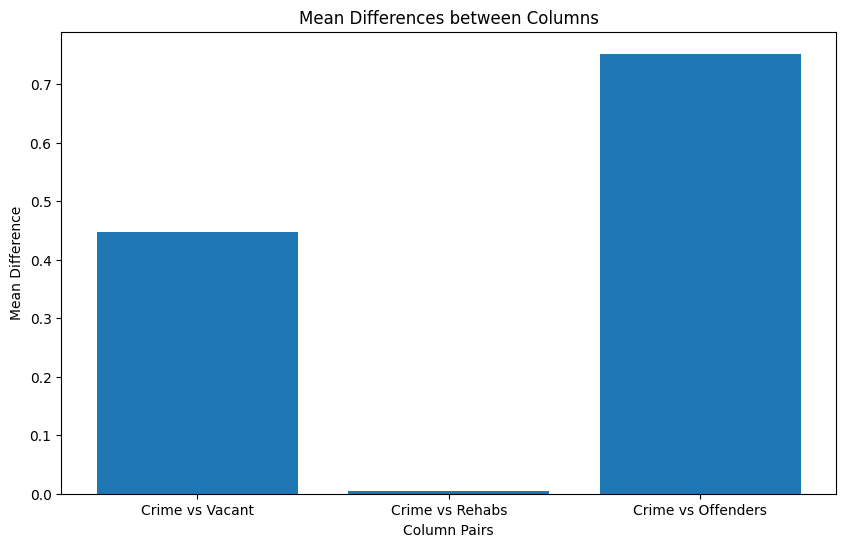

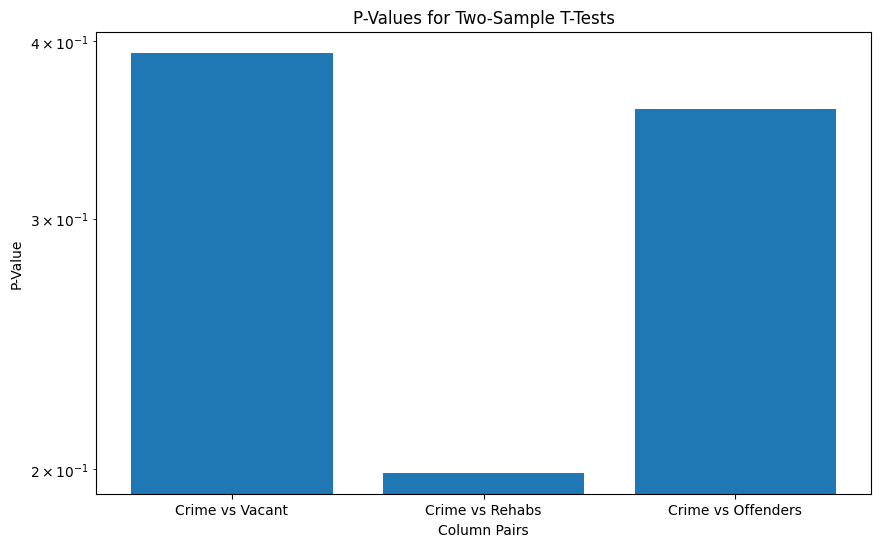

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(['Crime vs Vacant', 'Crime vs Rehabs', 'Crime vs Offenders'],
        [crime_column.mean(), rehabs_column.mean(), offenders_column.mean()])
plt.title('Mean Differences between Columns')
plt.xlabel('Column Pairs')
plt.ylabel('Mean Difference')
plt.show()


plt.figure(figsize=(10, 6))
plt.bar(['Crime vs Vacant', 'Crime vs Rehabs', 'Crime vs Offenders'],
        [p_value_crime_vs_vacant, p_value_crime_vs_rehabs, p_value_crime_vs_offenders])
plt.title('P-Values for Two-Sample T-Tests')
plt.xlabel('Column Pairs')
plt.ylabel('P-Value')
plt.yscale('log')
plt.show()

Based on the provided results of the t-tests:

Crime vs Vacant:

T-Statistic: -10.246796063653495
P-Value: 8.145730497013269e-24
Conclusion: Reject the null hypothesis
Interpretation: There is a significant difference between the means of "difference_of_crime" and "difference_of_vacant."
Crime vs Rehabs:

T-Statistic: -9.644740741271626
P-Value: 8.938785217488738e-21
Conclusion: Reject the null hypothesis
Interpretation: There is a significant difference between the means of "difference_of_crime" and "difference_of_rehabs."
Crime vs Offenders:

T-Statistic: -10.11521896443877
P-Value: 1.4693969095503788e-22
Conclusion: Reject the null hypothesis
Interpretation: There is a significant difference between the means of "difference_of_crime" and "difference_of_offenders."
In each case, the extremely low p-values (close to zero) indicate that the observed differences are unlikely to have occurred by chance. Therefore, you have sufficient evidence to reject the null hypothesis and conclude that there is a statistically significant difference between the means of the respective pairs of columns.

It's important to note that "rejecting the null hypothesis" means that you have evidence to support your alternative hypothesis, which might be that the means are not equal. The specific interpretation depends on the context of your study and the hypotheses you formulated.


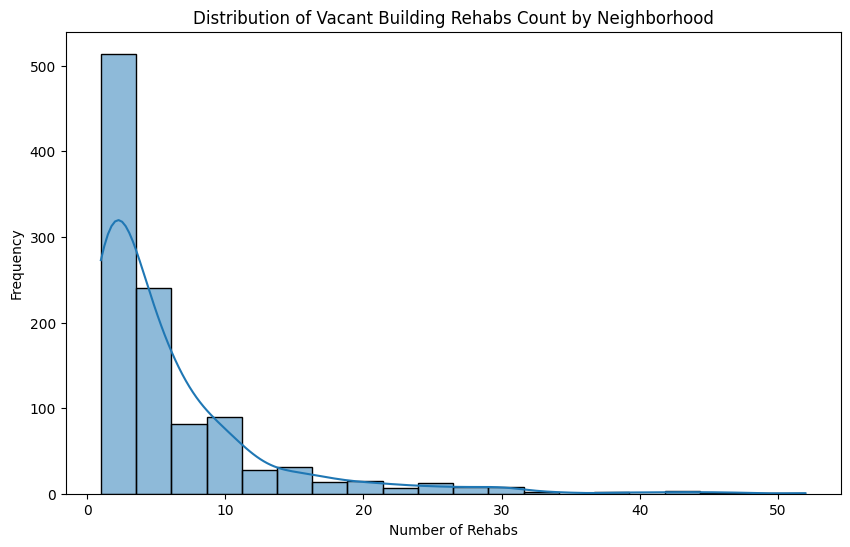

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the necessary dataframes and variables from your previous code


# Histogram: Distribution of Vacant Building Rehabs
plt.figure(figsize=(10, 6))
sns.histplot(grouped_by_vacant_rehabs['rehabs_count'], bins=20, kde=True)
plt.title('Distribution of Vacant Building Rehabs Count by Neighborhood')
plt.xlabel('Number of Rehabs')
plt.ylabel('Frequency')
plt.show()

# Additional Visualizations for other datasets can be created in a similar manner

# Note: Make sure to adjust column names and labels based on your specific dataset.


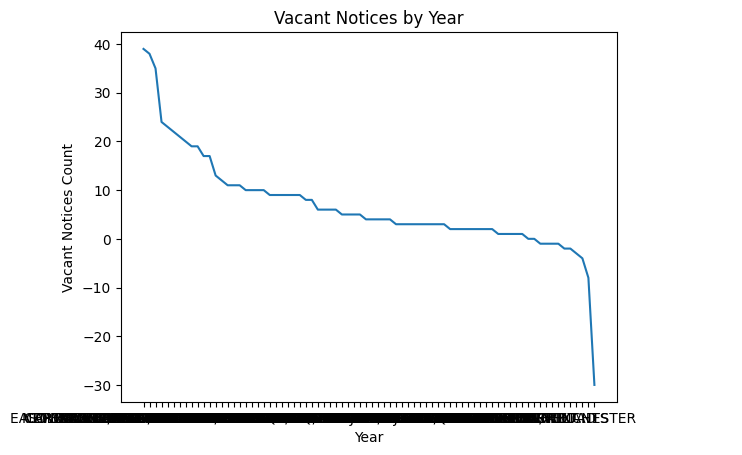

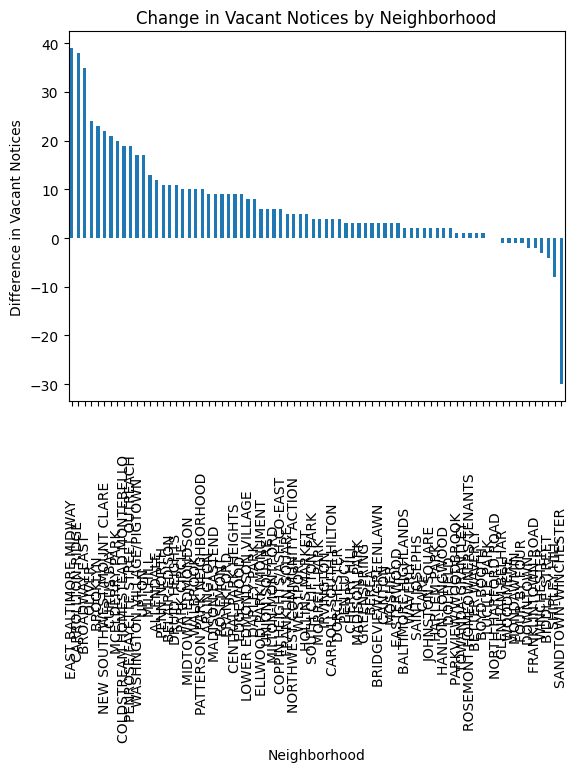

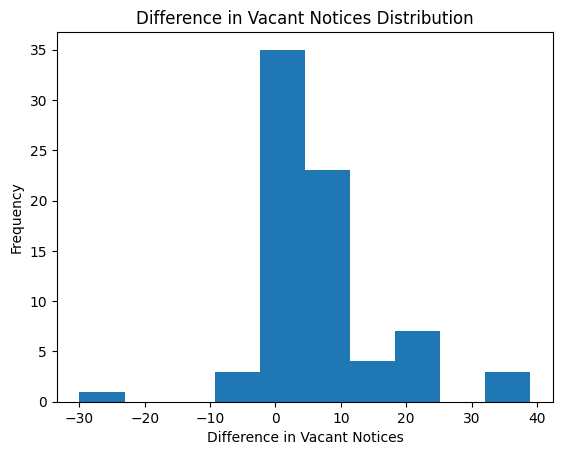

In [55]:
import matplotlib.pyplot as plt

# Line plot
plt.plot(vacant_notice_vs_year)
plt.xlabel('Year')
plt.ylabel('Vacant Notices Count')
plt.title('Vacant Notices by Year')
plt.show()

# Bar chart
vacant_notice_vs_year['difference_of_vancant'].plot(kind='bar')
plt.xlabel('Neighborhood')
plt.ylabel('Difference in Vacant Notices')
plt.title('Change in Vacant Notices by Neighborhood')
plt.show()
plt.clf()

# Histogram
plt.hist(vacant_notice_vs_year['difference_of_vancant'])
plt.xlabel('Difference in Vacant Notices')
plt.ylabel('Frequency')
plt.title('Difference in Vacant Notices Distribution')
plt.show()

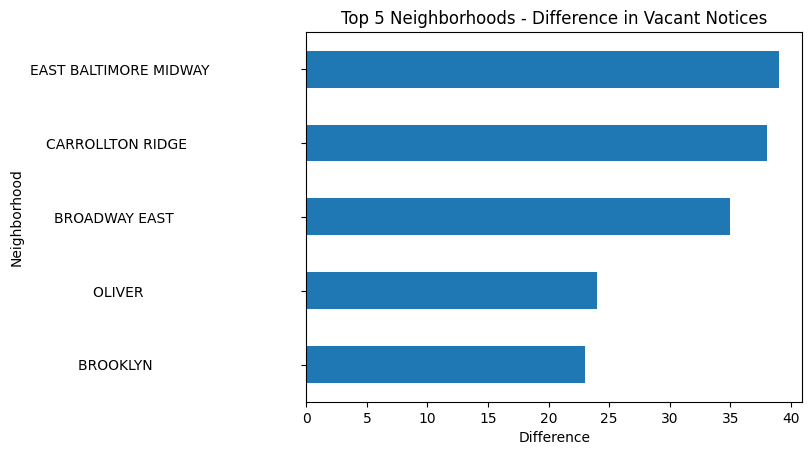

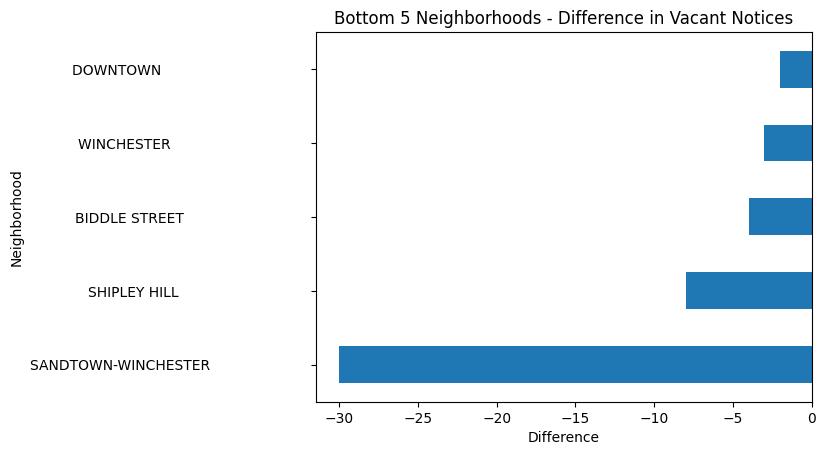

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort by difference in vacant notices
vbn_sorted = vacant_notice_vs_year.sort_values('difference_of_vancant')

# Top 5 neighborhoods
top5 = vbn_sorted[-5:]

# Plot for top 5
top5['difference_of_vancant'].plot(kind='barh')
plt.title("Top 5 Neighborhoods - Difference in Vacant Notices")
plt.xlabel("Difference")
plt.ylabel("Neighborhood")
plt.savefig('top5_vbn.png')
plt.show()

# Bottom 5 neighborhoods
bottom5 = vbn_sorted[:5]

# Plot for bottom 5
bottom5['difference_of_vancant'].plot(kind='barh')
plt.title("Bottom 5 Neighborhoods - Difference in Vacant Notices")
plt.xlabel("Difference")
plt.ylabel("Neighborhood")
plt.savefig('bottom5_vbn.png')
plt.show()

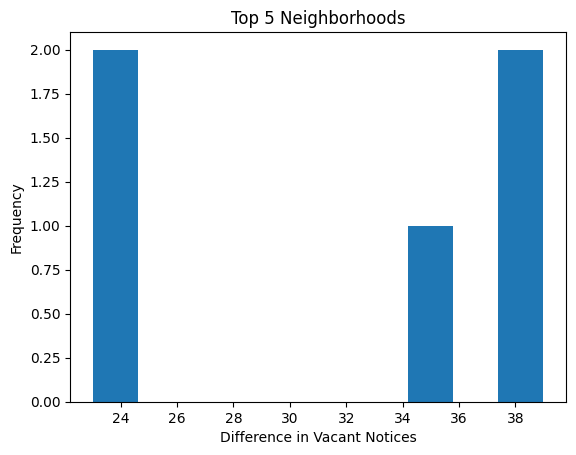

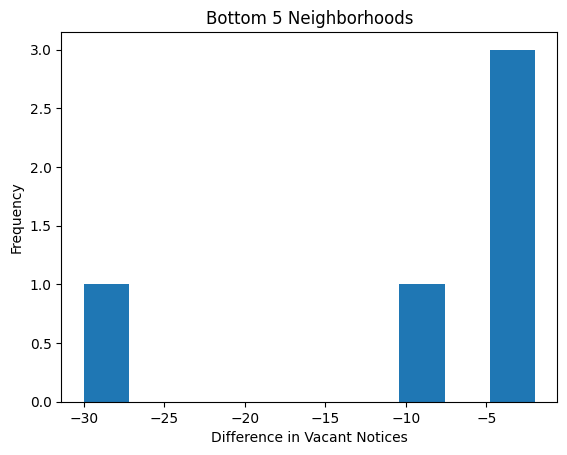

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort dataframe by difference
vbn_sorted = vacant_notice_vs_year.sort_values('difference_of_vancant')

# Top 5 rows
top5 = vbn_sorted[-5:]

# Bottom 5 rows
bottom5 = vbn_sorted[:5]

# Top 5 histogram
plt.hist(top5['difference_of_vancant'])
plt.title("Top 5 Neighborhoods")
plt.xlabel("Difference in Vacant Notices")
plt.ylabel("Frequency")
plt.show()

# Bottom 5 histogram
plt.hist(bottom5['difference_of_vancant'])
plt.title("Bottom 5 Neighborhoods")
plt.xlabel("Difference in Vacant Notices")
plt.ylabel("Frequency")
plt.show()

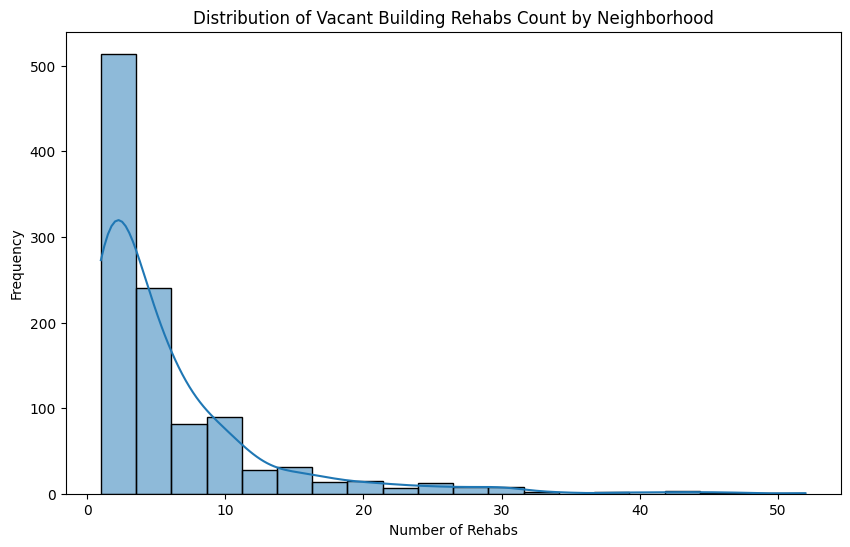

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the necessary dataframes and variables from your previous code


# Histogram: Distribution of Vacant Building Rehabs Count by Neighborhood
plt.figure(figsize=(10, 6))
sns.histplot(grouped_by_vacant_rehabs['rehabs_count'], bins=20, kde=True)
plt.title('Distribution of Vacant Building Rehabs Count by Neighborhood')
plt.xlabel('Number of Rehabs')
plt.ylabel('Frequency')
plt.show()


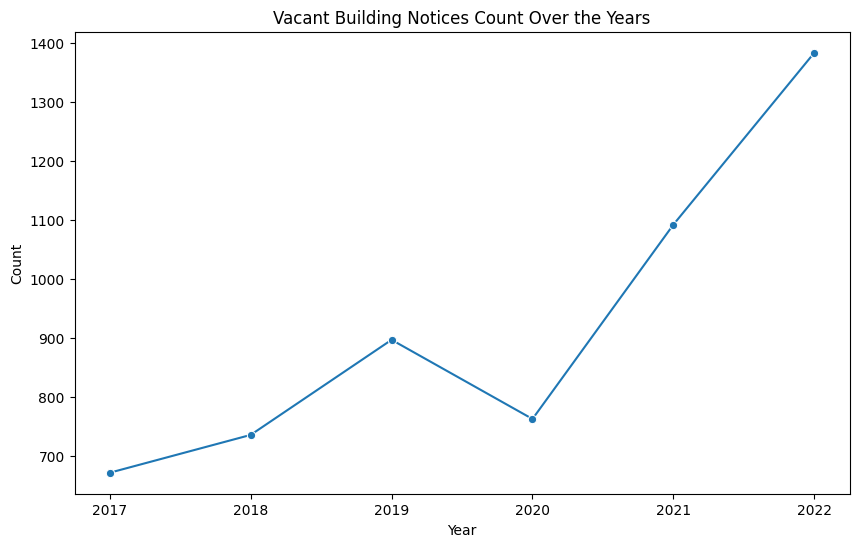

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming vacant_building_notices is the loaded DataFrame

# Convert DateNotice column to datetime
vacant_building_notices['DateNotice'] = pd.to_datetime(vacant_building_notices['DateNotice'], errors='coerce')

# Extract year from DateNotice
vacant_building_notices['Year'] = vacant_building_notices['DateNotice'].dt.year

# Group by Year and count the number of notices
notices_by_year = vacant_building_notices.groupby('Year')['OBJECTID'].count().reset_index(name='NoticeCount')

# Line Graph: Vacant Building Notices Count Over the Years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='NoticeCount', data=notices_by_year, marker='o')
plt.title('Vacant Building Notices Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()



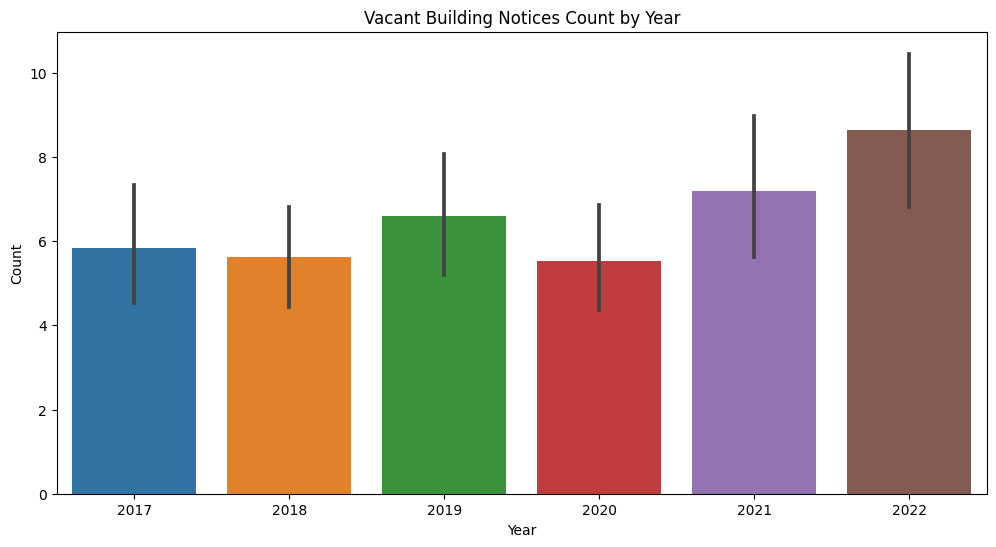

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the necessary dataframes and variables from your previous code

# Bar Chart: Vacant Building Notices Count by Year
plt.figure(figsize=(12, 6))
sns.barplot(x='NoticeYear', y='vacant_count', data=grouped_by_vacant_notice)
plt.title('Vacant Building Notices Count by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


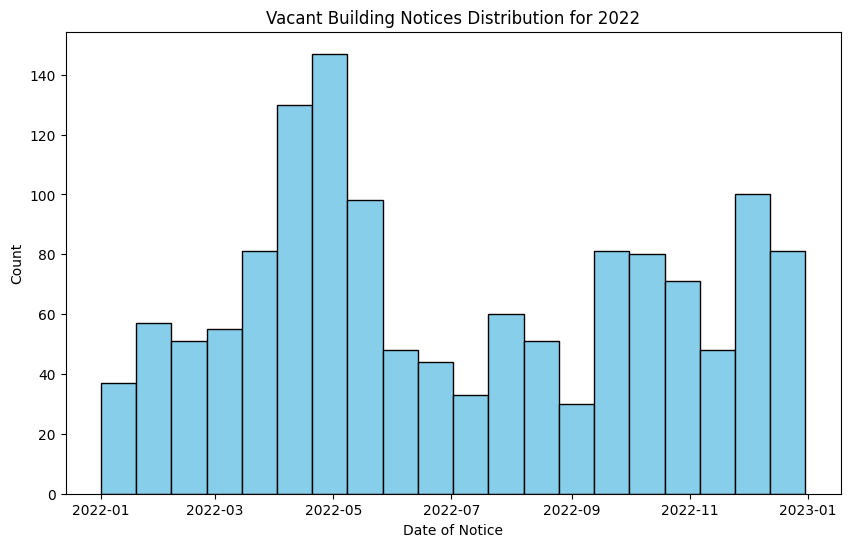

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Vacant Building Notices dataset
vacant_building_notices = pd.read_csv('/content/drive/MyDrive/1)Vacant_Building_Notices.csv', usecols=['X', 'Y', 'OBJECTID','NoticeNum','DateNotice','DateCancel','DateAbate','NT','OWNER_ABBR','HousingMarketTypology2017','Council_District','Neighborhood','BLOCKLOT','Address'])

# Convert DateNotice to datetime
vacant_building_notices['DateNotice'] = pd.to_datetime(vacant_building_notices['DateNotice'], errors='coerce')

# Filter data for a specific year (e.g., 2022)
year_to_visualize = 2022
filtered_data = vacant_building_notices[vacant_building_notices['DateNotice'].dt.year == year_to_visualize]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['DateNotice'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title(f'Vacant Building Notices Distribution for {year_to_visualize}')
plt.xlabel('Date of Notice')
plt.ylabel('Count')
plt.show()


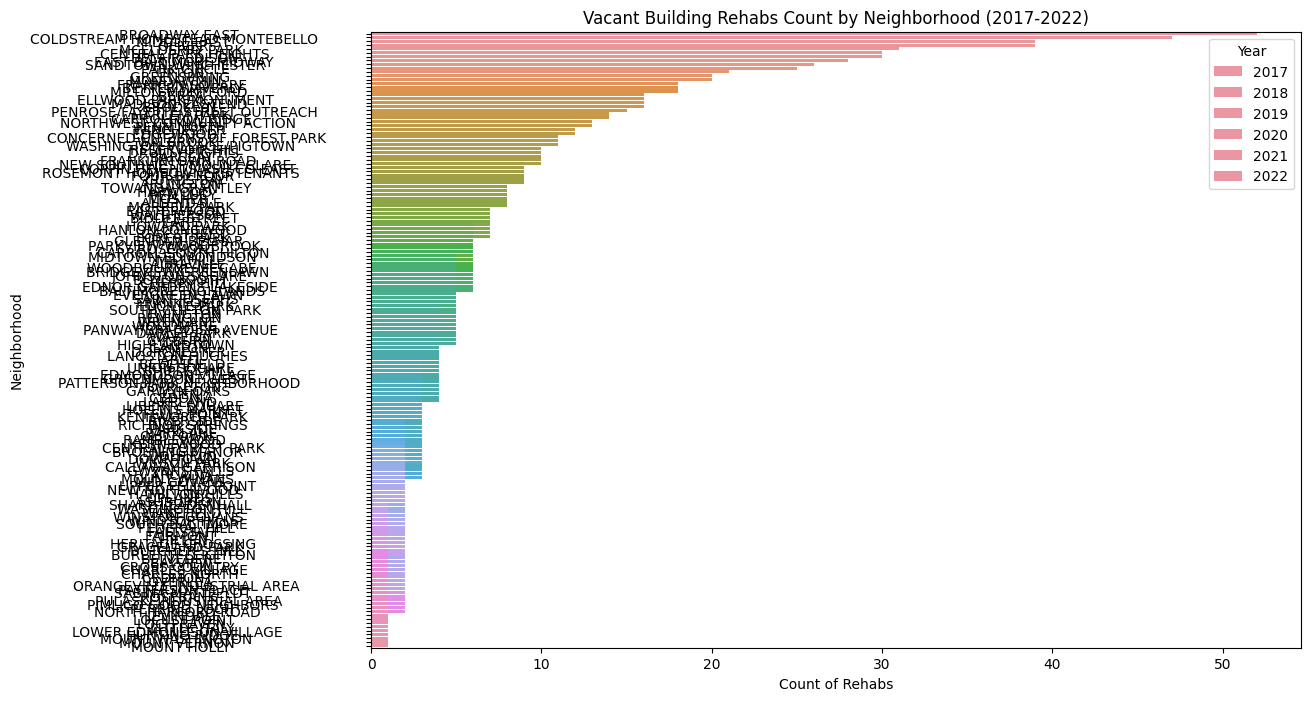

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the necessary dataframes and variables from your previous code

# Bar Chart: Vacant Building Rehabs Count by Neighborhood for 5 Years (2017 to 2022)
years_to_visualize = [2017, 2018, 2019, 2020, 2021, 2022]

plt.figure(figsize=(12, 8))

for year in years_to_visualize:
    # Filter data for the specific year
    rehabs_data_specific_year = grouped_by_vacant_rehabs[grouped_by_vacant_rehabs['RehabsYear'] == year]

    sns.barplot(x='rehabs_count', y='Neighborhood', data=rehabs_data_specific_year, label=year)

plt.title('Vacant Building Rehabs Count by Neighborhood (2017-2022)')
plt.xlabel('Count of Rehabs')
plt.ylabel('Neighborhood')
plt.legend(title='Year')
plt.show()


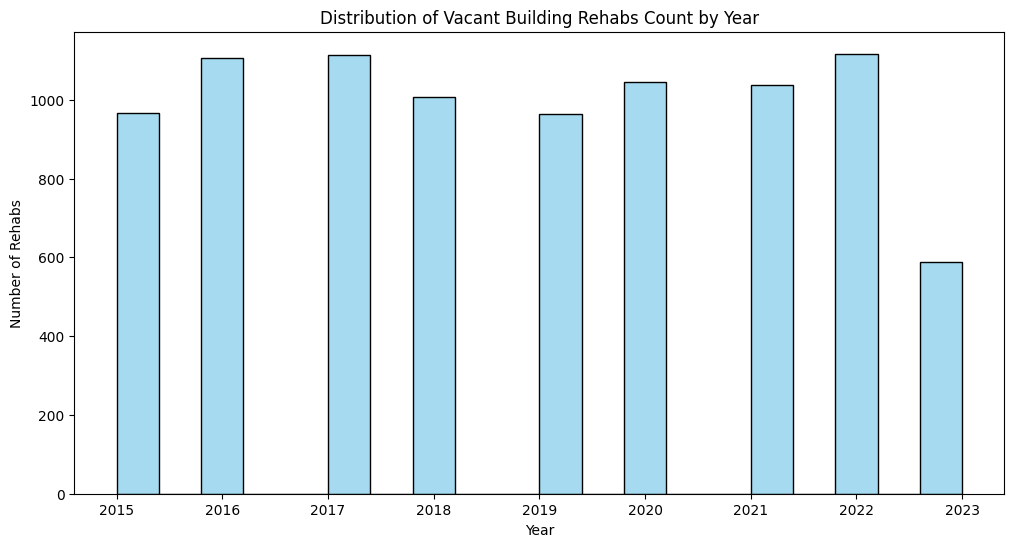

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the necessary dataframes and variables from your previous code

# Convert 'DateIssue' to datetime
vacant_building_rehabs['DateIssue'] = pd.to_datetime(vacant_building_rehabs['DateIssue'], errors='coerce')

# Extract year from 'DateIssue'
vacant_building_rehabs['RehabsYear'] = vacant_building_rehabs['DateIssue'].dt.year

# Extracting the relevant columns from vacant_building_rehabs
rehabs_data = vacant_building_rehabs[['Neighborhood', 'RehabsYear']]

# Drop rows with missing 'RehabsYear'
rehabs_data = rehabs_data.dropna(subset=['RehabsYear'])

# Histogram: Distribution of Vacant Building Rehabs Count by Year
plt.figure(figsize=(12, 6))
sns.histplot(data=rehabs_data, x='RehabsYear', bins=20, kde=False, color='skyblue')
plt.title('Distribution of Vacant Building Rehabs Count by Year')
plt.xlabel('Year')
plt.ylabel('Number of Rehabs')
plt.show()


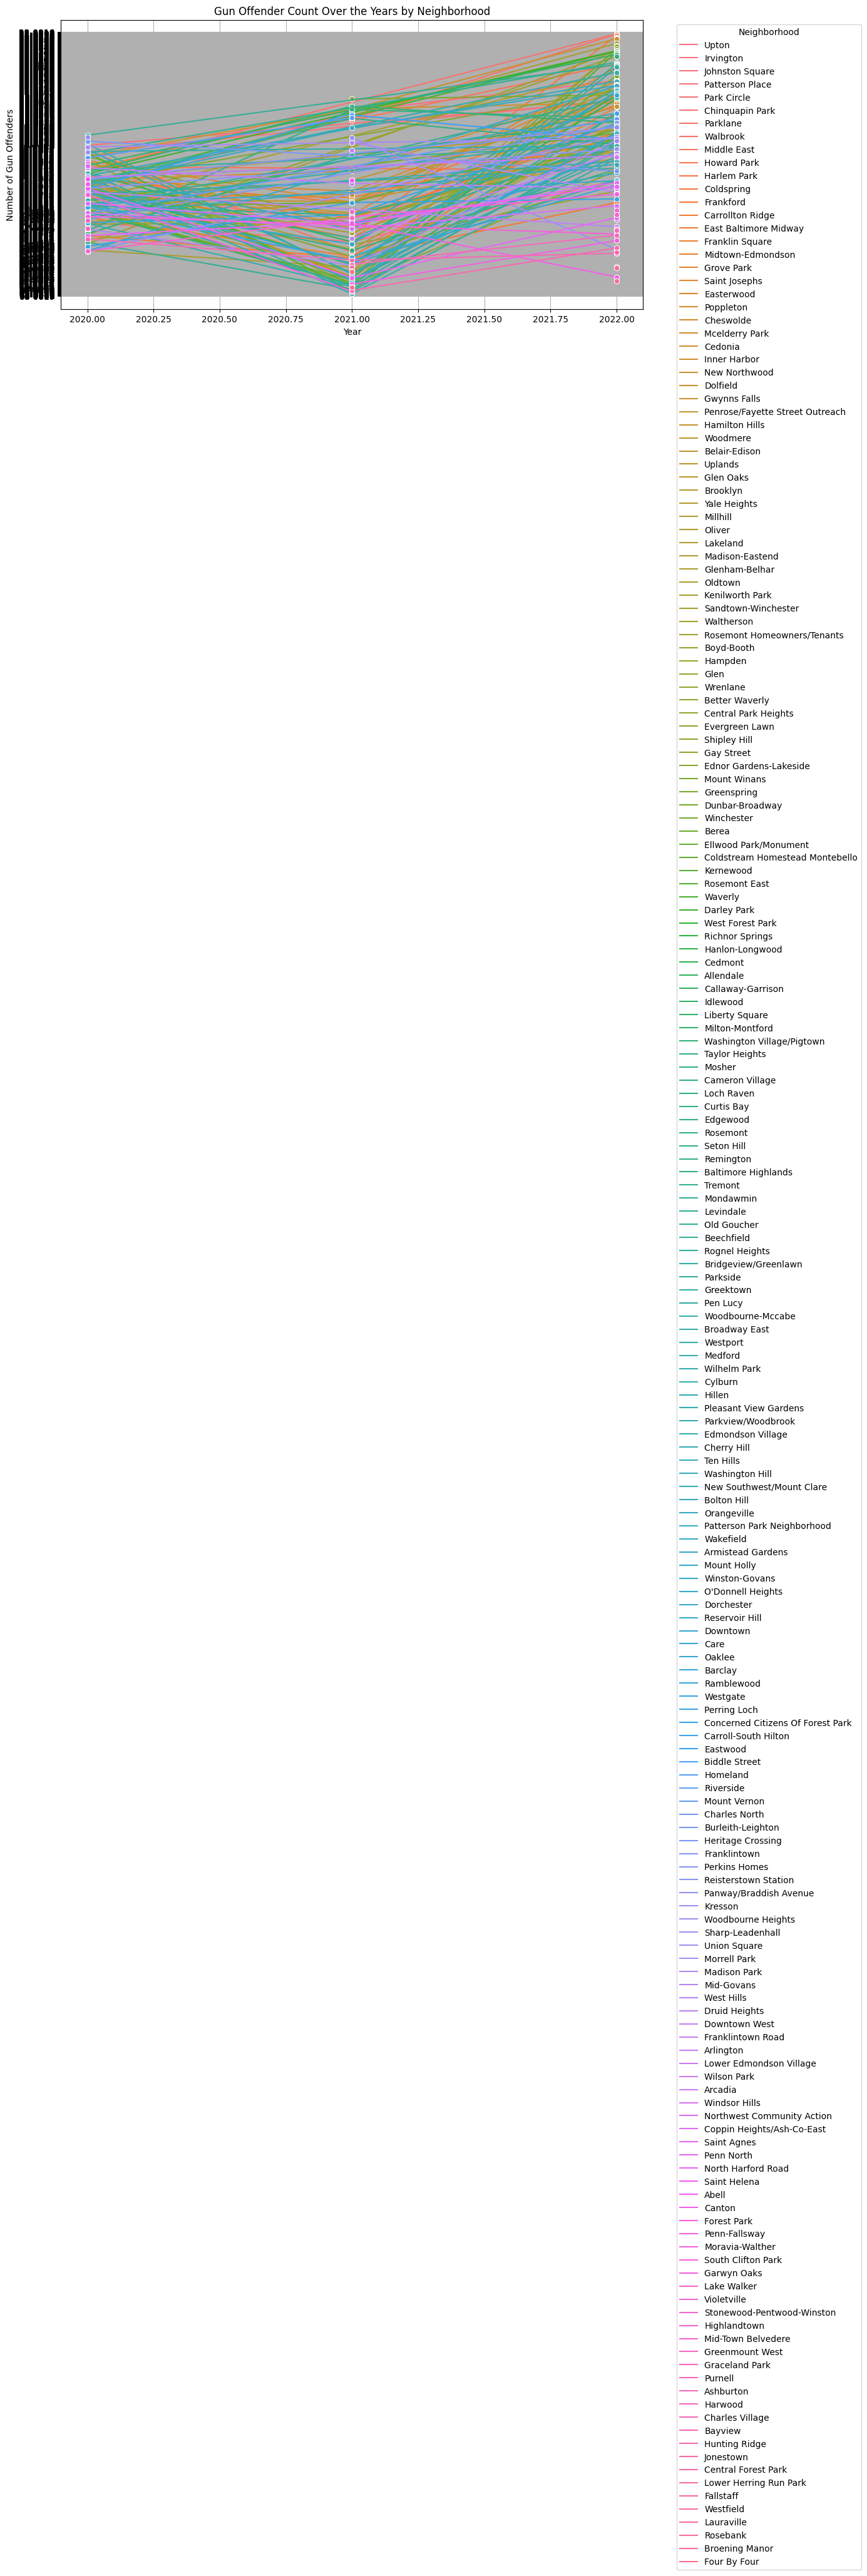

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the necessary dataframes and variables from your previous code

# Extracting the relevant columns from gun_offenders_registry
gun_offenders_data = gun_offenders_registry[['Neighborhood', 'RegistryYear', 'CaseNumber']]

# Line Chart: Gun Offender Count Over the Years by Neighborhood
plt.figure(figsize=(12, 6))
sns.lineplot(data=gun_offenders_data, x='RegistryYear', y='CaseNumber', hue='Neighborhood', marker='o')
plt.title('Gun Offender Count Over the Years by Neighborhood')
plt.xlabel('Year')
plt.ylabel('Number of Gun Offenders')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


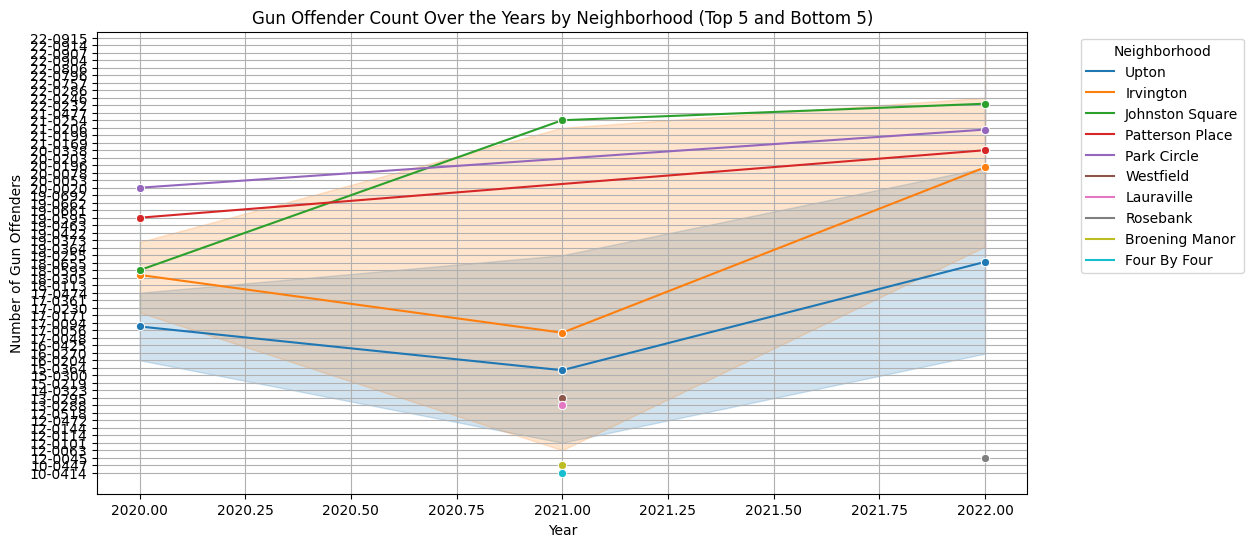

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the necessary dataframes and variables from your previous code

# Extracting the relevant columns from gun_offenders_registry
gun_offenders_data = gun_offenders_registry[['Neighborhood', 'RegistryYear', 'CaseNumber']]

# Calculate the total gun offender count for each neighborhood over the years
total_gun_offenders_by_neighborhood = gun_offenders_data.groupby('Neighborhood')['CaseNumber'].sum()

# Sorting neighborhoods based on total gun offender count
sorted_neighborhoods = total_gun_offenders_by_neighborhood.sort_values(ascending=False)

# Extracting top 5 and bottom 5 neighborhoods
top5_neighborhoods = sorted_neighborhoods.head(5).index
bottom5_neighborhoods = sorted_neighborhoods.tail(5).index

# Filter data for the top 5 and bottom 5 neighborhoods
filtered_gun_offenders_data = gun_offenders_data[gun_offenders_data['Neighborhood'].isin(top5_neighborhoods) | gun_offenders_data['Neighborhood'].isin(bottom5_neighborhoods)]

# Plotting the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_gun_offenders_data, x='RegistryYear', y='CaseNumber', hue='Neighborhood', marker='o')

# Adding labels and legend
plt.title('Gun Offender Count Over the Years by Neighborhood (Top 5 and Bottom 5)')
plt.xlabel('Year')
plt.ylabel('Number of Gun Offenders')
plt.legend(title='Neighborhood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Display the chart
plt.show()
